# 1. Introduction
- Every year from 2017, Kaggle conducts an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live for 3.5 weeks in October and had 20,036 responses from over 55 countries and diverse demographics answering a wide range of questions ranging from frequently used ML algorithms, frameworks, cloud platforms, and products to the preferred programming languages and many others.

# 2. Business Understanding
- As more and more companies are entering the digital world, the role of data science is becoming very important for the growth and development of these companies. Data Science as a field is also continuously evolving with new tools entering into the field every now and then. It becomes extremely important to uderstand the current tools and practices of the field for the aspiring data scientists in order to enter into the field. I am going to analyze the Kaggle 2020 Data Science and Machine Learning Survey to understand the current tools, frameworks and practices existing in the field by answering many questions through data and visualization.

## Import necessary libraries

In [1]:
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

#### The code below will display all the columns along with all the content of each column

In [2]:
pd.set_option('display.max_columns', 355)
pd.set_option('display.max_rows', 355)
pd.set_option('display.max_colwidth', 200)

#### Read data into pandas dataframe

In [3]:
df = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', dtype = 'object')

# display the first three rows of the dataframe
df.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

In [4]:
# print the shape of the dataframe
df.shape

(20037, 355)

# 3. Data Understanding & EDA

In [5]:
# get basic description about the dataset
df.describe().T

,count,unique,top,freq
Time from Start to Finish (seconds),20037,4196,565,36
Q1,20037,12,25-29,4011
Q2,20037,6,Man,15789
Q3,20037,56,India,5851
Q4,19570,8,Master’s degree,7859
Q5,19278,14,Student,5171
Q6,19121,8,3-5 years,4546
Q7_Part_1,15531,2,Python,15530
Q7_Part_2,4278,2,R,4277
Q7_Part_3,7536,2,SQL,7535


### Check for null values in each column

In [6]:
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
Q5                                       759
Q6                                       916
Q7_Part_1                               4506
Q7_Part_2                              15759
Q7_Part_3                              12501
Q7_Part_4                              16721
Q7_Part_5                              16209
Q7_Part_6                              16669
Q7_Part_7                              17041
Q7_Part_8                              19774
Q7_Part_9                              19838
Q7_Part_10                             18260
Q7_Part_11                             17819
Q7_Part_12                             19830
Q7_OTHER                               18091
Q8                                      2215
Q9_Part_1                               8825
Q9_Part_2 

- There are lot of NaN values in each column

In [7]:
# print the columns that have more than 50% null values
list(df.columns[df.isnull().sum() / len(df) > 0.5])

['Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_Part_9',
 'Q9_Part_10',
 'Q9_Part_11',
 'Q9_OTHER',
 'Q10_Part_1',
 'Q10_Part_2',
 'Q10_Part_3',
 'Q10_Part_4',
 'Q10_Part_5',
 'Q10_Part_6',
 'Q10_Part_7',
 'Q10_Part_8',
 'Q10_Part_9',
 'Q10_Part_10',
 'Q10_Part_11',
 'Q10_Part_12',
 'Q10_Part_13',
 'Q10_OTHER',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_3',
 'Q12_OTHER',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHER',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_11',
 'Q16_Part_12',
 'Q16_Part_13',
 'Q16_Part_14',
 'Q16_Part_15',
 'Q16_OTHER',
 'Q17_P

In [8]:
# Remove the first row from the dataframe. It contains details of the questions.
df = df.iloc[1:, :]
df.shape

(20036, 355)

## Part 1: Insights from demographic responses of data science practitioners
- This part includes creating visualizations for the following responses of the participants:
    1. Most common age group
    2. Gender
    3. Country
    4. Highest formal education
    5. Job titles
    6. Coding experience
    7. Recommended language for breaking into the field

### Helper function to plot bar charts

In [9]:
def bar_plot(data, title = '', x_label = '', y_label = '', fig_size = (), spine = False, legend = False, 
             show_annotations = False):
    """
    This function will display the bar plot
    Args: 
        data:            column of the dataframe to plot
        title:           string containing the title of the bar plot
        x_label:         string containing the x_label of the plot
        y_label:         string containing the y_label of the plot
        fig_size:        tuple of int containing the size of the figure object
        spine:           boolean (to disable y-axis)
        legend:          boolean (to remove legend)
        show_annotation: boolean (to show height of bars)
    """
    fig, ax = plt.subplots(figsize = fig_size)
    data.plot(kind = 'bar', fontsize = 12, ax = ax, width = 0.8)
    
    # set title and labels of the plot
    ax.set_title(title, fontsize = 15)
    ax.set_xlabel(x_label, fontsize = 12)
    if not spine:
        ax.set_ylabel(y_label, fontsize = 12)
    
    # remove y-axis
    if spine:
        for spine in plt.gca().spines.values():
            spine.set_visible(False)
            plt.yticks([])
    
    # show annotations on the bar graph
    
    if show_annotations:
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height() 
            x, y = p.get_xy() 
            # ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.05, p.get_height() + 1)) 
            ax.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.01), ha = 'center', fontsize = 12)
            
    if legend:
        ax.get_legend().remove()

## Q1: What are the different age groups present in the dataset? To which age group does most data science practitioners belong in the survey?

In [10]:
# Number of practitioners in different age groups
df['Q1'].value_counts()

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

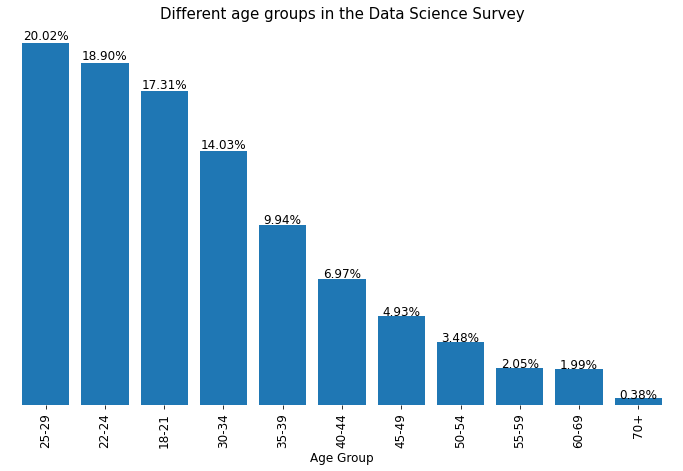

In [11]:
# set the title of the plot
title = 'Different age groups in the Data Science Survey'

# call the function to plot 
bar_plot(df['Q1'].value_counts(normalize = True), x_label = 'Age Group', title = title, fig_size = (12, 7), 
         spine = True, show_annotations = True)

- The majority of data science practitioners have **less than 30 years** of age, constituting **more than 56% of the responses**. Maximum responses are from the **age group [25-29] years** (20% practitioners in this age group) in the survey.
- There are very few practitioners with **70+ years of age (less than 0.5%)**.

## Q2: What is the proportion of data science practitioners in each gender in the survey?

In [12]:
df['Q2'].value_counts()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

In [13]:
## Clean gender column
# combine other genders except man and woman into a separate category called other_gender

def group_gender(gen):
    if gen == 'Man' or gen == 'Woman':
        return gen
    else:
        return 'other_gender'

    
# apply the function on gender column
df['Q2'] = df['Q2'].apply(group_gender)

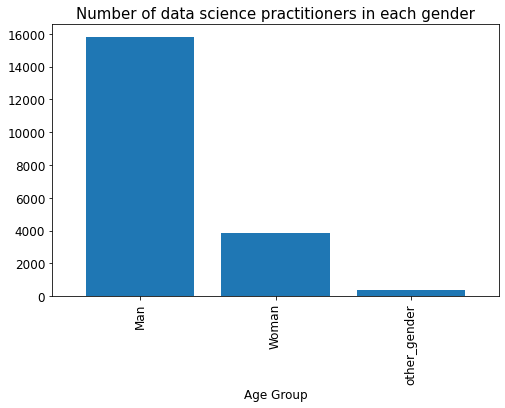

In [14]:
title = 'Number of data science practitioners in each gender'

# call the function to plot 
bar_plot(df['Q2'].value_counts(), x_label = 'Age Group', title = title, fig_size = (8, 5))

- The majority of practitioners in the survey are **Male**. 
- It appears from the survey that **Female** practitioners are less in the field of data science.

## Q3: Which country has the most number of data science practitioners?

In [15]:
## clean the country column by reducing the length of the country name
df['Q3'] = df['Q3'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'UK & NI')
df['Q3'] = df['Q3'].str.replace('United States of America', 'USA')

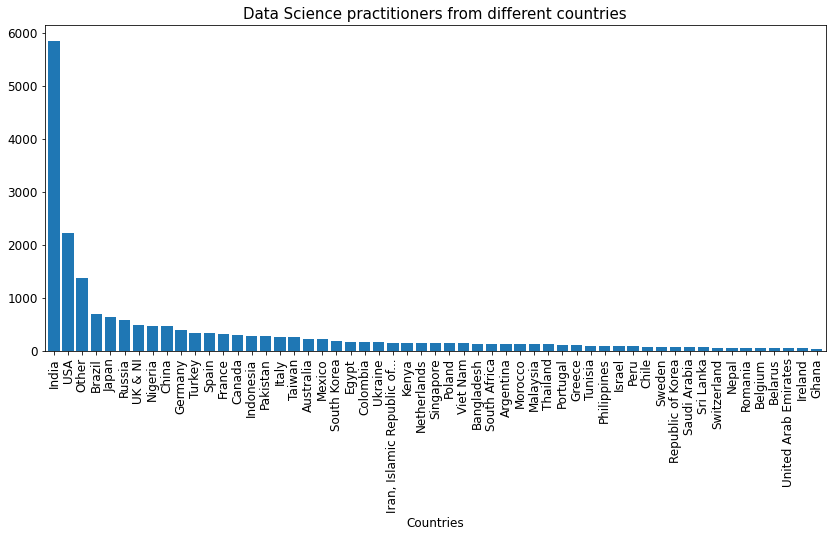

In [16]:
title = 'Data Science practitioners from different countries'
bar_plot(df['Q3'].value_counts(), x_label = 'Countries', title = title, fig_size = (14, 6))

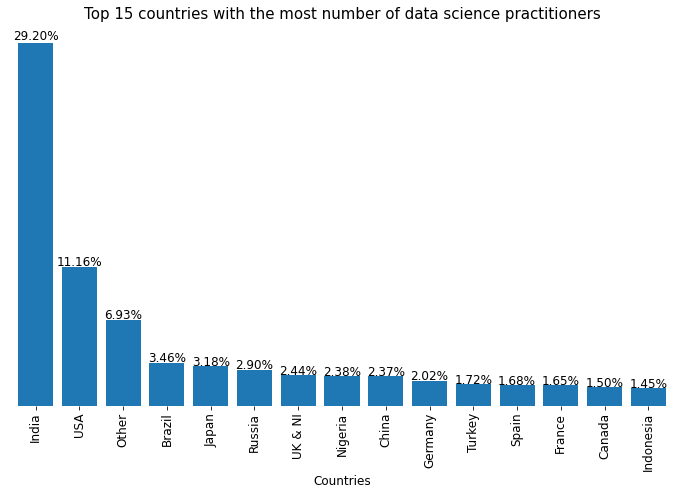

In [17]:
# Plot only the top 15 countries
title = 'Top 15 countries with the most number of data science practitioners'
bar_plot(df['Q3'].value_counts(normalize = True).iloc[:15], x_label = 'Countries', title = title, 
         fig_size = (12, 7), spine = True, show_annotations = True)

- **India** has the most number of data science practitioners followed by **United States**, according to the survey.

## Q4: What is the highest level of formal education attained by the practitioners in the survey?

In [18]:
# get the value counts of the educational status
df['Q4'].value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

In [19]:
# clean the column values (shorten the strings in the column)
df['Q4'] = df['Q4'].replace('Some college/university study without earning a bachelor’s degree', 'No Bachelor degree')
df['Q4'] = df['Q4'].replace('No formal education past high school', 'High School')
df['Q4'] = df['Q4'].replace('I prefer not to answer', 'Not answered')

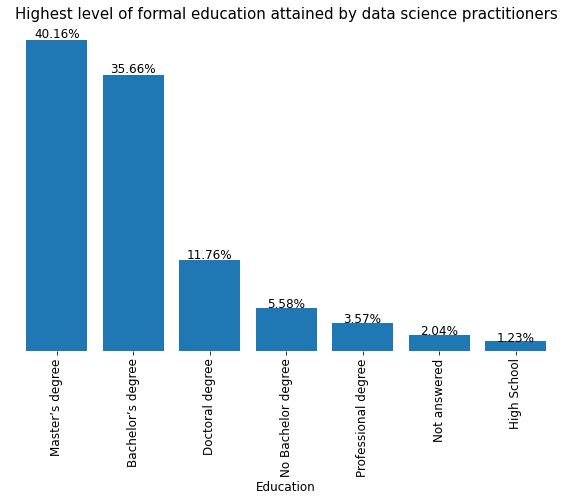

In [20]:
title = 'Highest level of formal education attained by data science practitioners'
bar_plot(df['Q4'].value_counts(normalize = True), x_label = 'Education', title = title, 
         fig_size = (10, 6), spine = True, show_annotations = True)

- Around 40% of data science practitioners have **Master's degree** and 35.66% have **Bachelor's degree** in the survey.
- There are also practitioners with **No formal education past high school constituting 1.23%**.

## Q5: What are the job titles of Data Science practitioners?

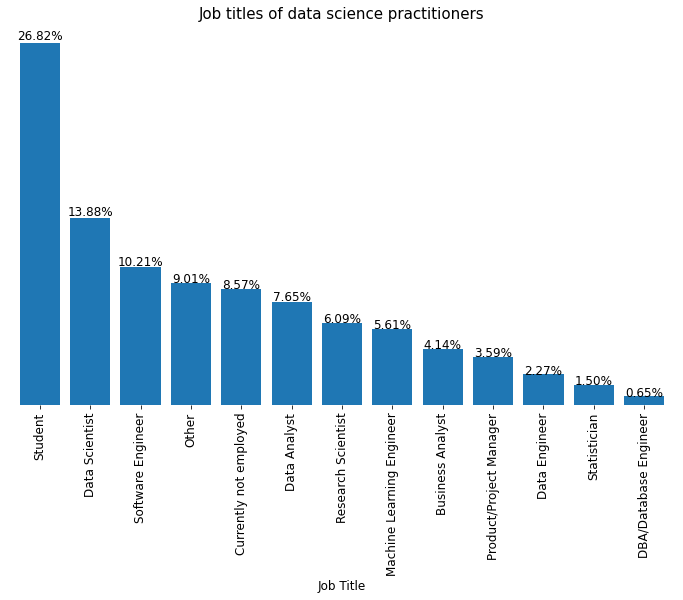

In [21]:
title = 'Job titles of data science practitioners'
bar_plot(df['Q5'].value_counts(normalize = True), x_label = 'Job Title', title = title, fig_size = (12, 7), 
         spine = True, show_annotations = True)

- The majority of data science practitioners are **Students followed by Data Scientist** in the survey.

## Q6: What is the coding experience of data science practitioners in the survey?

In [22]:
# Education status of practitioners
df['Q6'].value_counts()

3-5 years                    4546
1-2 years                    4505
< 1 years                    3313
5-10 years                   2552
10-20 years                  1751
20+ years                    1329
I have never written code    1124
Name: Q6, dtype: int64

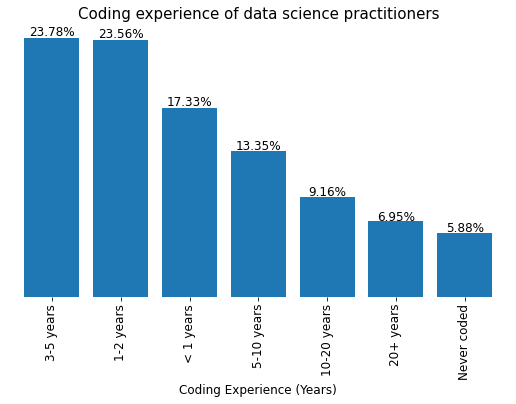

In [23]:
# change "I have never written code" to "Never coded"
df['Q6'] = df['Q6'].replace('I have never written code', 'Never coded')

title = 'Coding experience of data science practitioners'
bar_plot(df['Q6'].value_counts(normalize = True), x_label = 'Coding Experience (Years)', title = title, fig_size = (9, 5), 
         spine = True, show_annotations = True)

- The majority of data science practitioners have less than **5 years of coding experience**. 
- About 17% practitioners have coding experience of less than 1 year. This shows that more and more students are breaking into the field.
- Only **7%** practitioners have coding experience of **more than 20 years** in the survey.

## Q7: Which are the most recommended programming languages for aspiring data scientists?

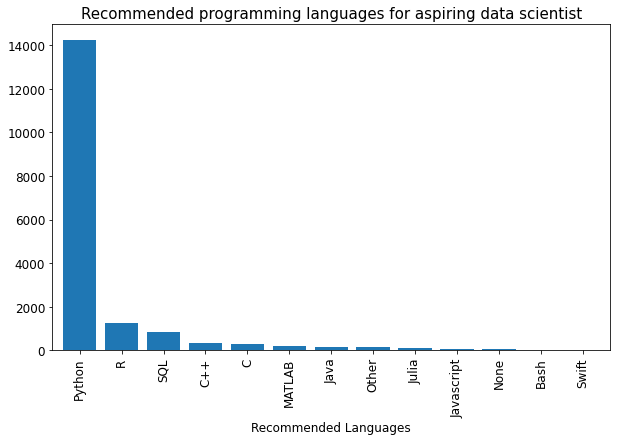

In [24]:
title = 'Recommended programming languages for aspiring data scientist'
bar_plot(df['Q8'].value_counts(), x_label = 'Recommended Languages', title = title, fig_size = (10, 6))

- **Python** is the most recommended programming language for aspiring **Data Scientists**.

## Part 2: Tools used by the data science practitioners on regular basis
- This part includes creating visualizations for the following responses of the participants:
    1. Programming languages
    2. IDEs 
    3. Hosted notebook products
    4. Computing platforms
    5. Specialized hardware
    6. Number of time TPU used
    7. Visualization libraries or tools
    8. Experience in ML methods
    9. Machine learning frameworks
    10. Frequently used ML algorithms
    11. Computer vision methods
    12. NLP methods
    13. Cloud computing platforms
    14. Cloud computing products
    15. Machine learning products
    16. Big data products (databases, data lakes)
    17. Business intelligence tools
    18. AutoML tools types
    19. AutoML tools
    20. Tools to manage ML experiments
    21. Platform to share or deploy ML models
    22. Platforms to learn data science skills

### Helper function to do the analysis of multiple columns
- There are certain groups of multiple columns that have similar information.
- For example, **columns from Q7_Part_1 to Q7_Part_12** have the entries of **programming languages** used by the data science practitioners on regular basis.
- This helper function will combine these groups of columns into a single dataframe by counting unique entries from each column.

In [25]:
def combine_similar_columns(num_cols = None, Q_num = None, cols = [], char = ''):
    """
    This function will combine multiple columns into a single dataframe
    Args: 
        num_cols: Number of columns to combine
        Q_num:    Question number of the starting column
        cols:     Name of the columns for the new dataframe
        char:     Some columns have characater such as 'A' or 'B' in their names
        
    return:
        returns the new dataframe after combining multiple columns
    """
    cols_dict = {}
    # iterate over the columns
    for i in range(1, num_cols):
        if char:
            # collect counts 
            cols_dict.update(dict(df[f"Q{str(Q_num)}_{char}_Part_{i}"].value_counts()))
        else:
            cols_dict.update(dict(df[f"Q{str(Q_num)}_Part_{i}"].value_counts()))
    
    # construct dataframe from dictionary
    cols_dict = pd.DataFrame(cols_dict.items(), columns = cols)
    cols_dict.set_index(cols[0], inplace = True)
    return cols_dict

## Q1: Which programming languages do the data science practitioners use on a regular basis?

In [26]:
# get the data on languages used
data = combine_similar_columns(num_cols = 13, Q_num = 7, cols = ['Languages', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Languages,
Python,15530
SQL,7535
R,4277
C++,3827
Java,3367
C,3315
Javascript,2995
MATLAB,2217
Bash,1776


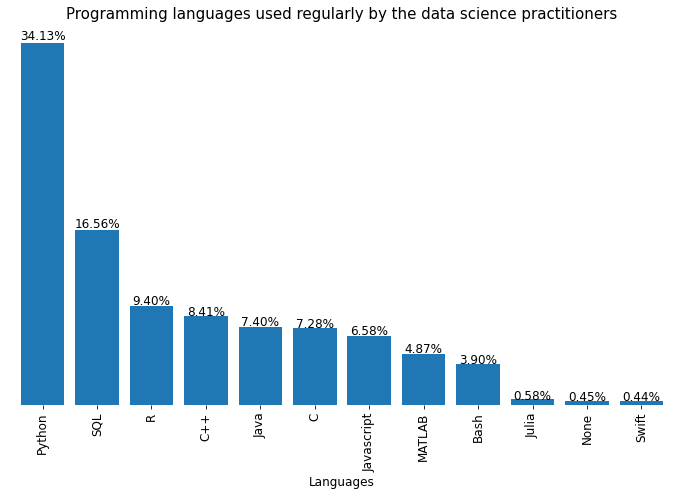

In [27]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Programming languages used regularly by the data science practitioners'
bar_plot(data, x_label = 'Languages', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Python** is the **most popular** programming language among the data science practitioners preferred by 34.13%.

## Q2: Which integrated development environments (IDE's) do the data science practitioners use on a regular basis?

In [28]:
# shorten the name of the IDE's
df['Q9_Part_1'] = df['Q9_Part_1'].str.split().str[0]
df['Q9_Part_4'] = df['Q9_Part_4'].str.split().str[-1]

In [29]:
# columns from Q9_Part_1 to Q9_Part_11 have the entries of IDE's
# used by the participants on regular basis

data = combine_similar_columns(num_cols = 12, Q_num = 9, cols = ['IDEs', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
IDEs,
Jupyter,11211
(VSCode),5873
PyCharm,5099
RStudio,3826
Spyder,3290
Notepad++,3132
Sublime Text,2452
Visual Studio,2445
MATLAB,1604


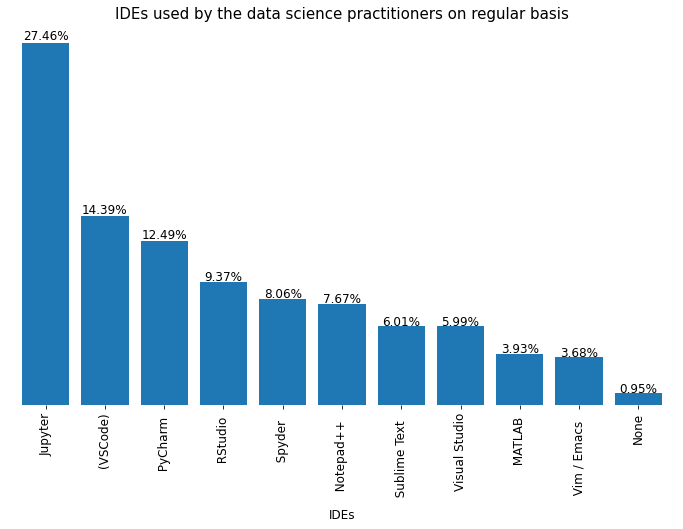

In [30]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'IDEs used by the data science practitioners on regular basis'
bar_plot(data, x_label = 'IDEs', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Jupyter (Labs, Notebooks)** is the most popular IDE followed by **Visual Studio Code (VSCode)** among the data science practitioners.

## Q3: Which hosted notebook products do the data science practitioners use on a regular basis?

In [31]:
# columns from Q10_Part_1 to Q10_Part_13 have the entries of hosted notebook products
# used by the participants on regular basis

data = combine_similar_columns(num_cols = 14, Q_num = 10, cols = ['Hosted Notebook', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Hosted Notebook,
Colab Notebooks,6329
Kaggle Notebooks,5992
None,5282
Binder / JupyterHub,2072
Google Cloud Datalab Notebooks,1231
Google Cloud AI Platform Notebooks,1218
Azure Notebooks,857
IBM Watson Studio,846
Amazon Sagemaker Studio,497


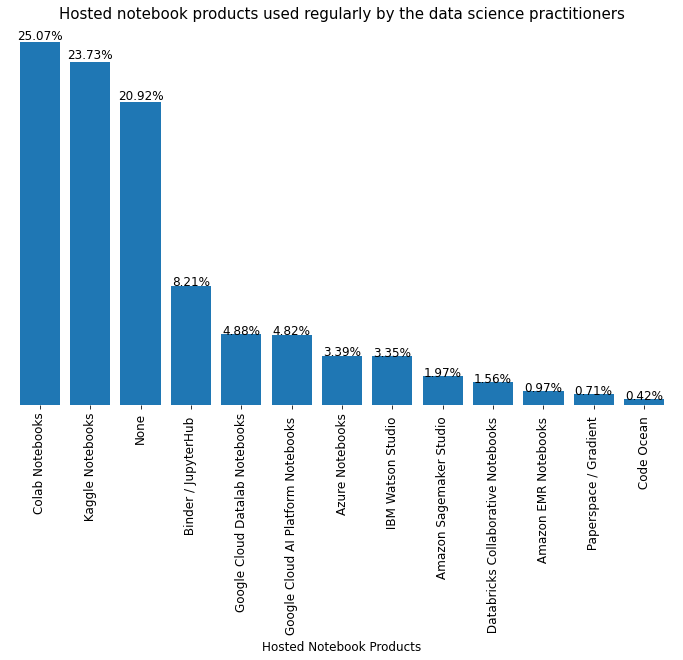

In [32]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Hosted notebook products used regularly by the data science practitioners'
bar_plot(data, x_label = 'Hosted Notebook Products', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Colab Notebooks** followed by **Kaggle Notebooks** are the most preferred hosted notebook products among the data science practitioners.

## Q4: What type of computing platforms do data science practitioners often use for data science projects? 

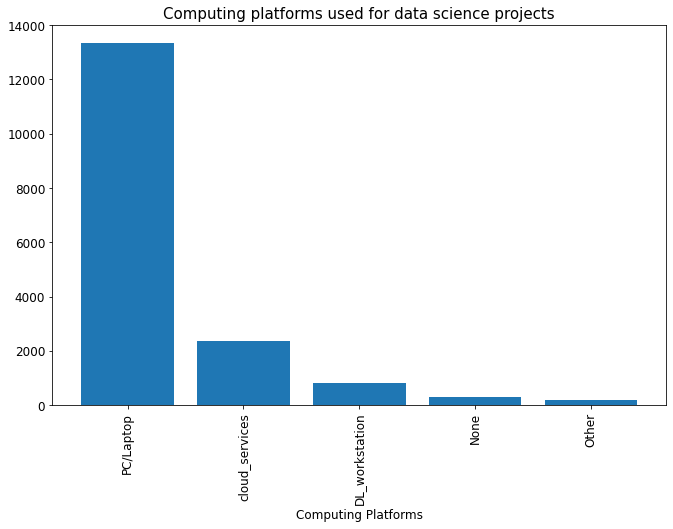

In [33]:
# clean the column values (shorten the string length in the column)
df['Q11'] = df['Q11'].replace('A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)', 'cloud_services')
df['Q11'] = df['Q11'].replace('A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)', 'DL_workstation')
df['Q11'] = df['Q11'].replace('A personal computer or laptop', 'PC/Laptop')

# plot 
title = 'Computing platforms used for data science projects'
bar_plot(df['Q11'].value_counts(), x_label = 'Computing Platforms', title = title, fig_size = (11, 7))

- **Personal computer or laptop** is used most often by the practitioners for data science projects.

## Q5: What type of specialized hardware do data science practitioners use on a regular basis?

In [34]:
# columns from Q12_Part_1 to Q12_Part_3 have the entries of specialized hardware
# used by the participants on regular basis

data = combine_similar_columns(num_cols = 4, Q_num = 12, cols = ['Specialized Hardware', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Specialized Hardware,
GPUs,8310
None,7891
TPUs,960


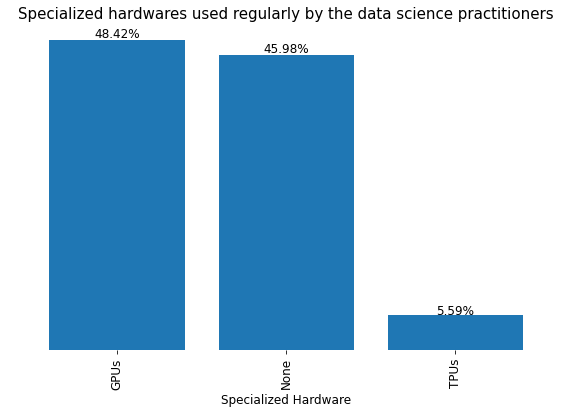

In [35]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Specialized hardwares used regularly by the data science practitioners'
bar_plot(data, x_label = 'Specialized Hardware', title = title, fig_size = (10, 6), spine = True, 
         show_annotations = True, legend = True)

- **GPUs** are used most frequenty by the data science practitioners.

- **TPUs** usage is very low. 

## Q6: Approximately how many times does a data science practitioner has used TPU (tensor processing unit)?

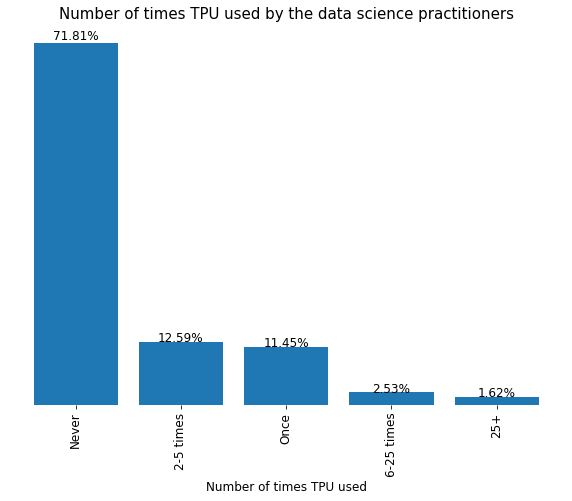

In [36]:
# shorten the length of the values of the column
df['Q13'] = df['Q13'].str.replace('More than 25 times', '25+')

title = 'Number of times TPU used by the data science practitioners'
bar_plot(df['Q13'].value_counts(normalize = True), x_label = 'Number of times TPU used', title = title, 
         fig_size = (10, 7), show_annotations = True, spine = True)

- About 72% of the data science practitioners have never used the **TPUs**.
- Only 1.62% have used **TPUs more than 25 times**.

## Q7: Which data visualization libraries or tools do data science practitioners use on a regular basis?

In [37]:
# columns from Q14_Part_1 to Q14_Part_11 have the entries of visualization libraries
# or tools used by the participants on regular basis

data = combine_similar_columns(num_cols = 12, Q_num = 14, cols = ['Visualization Tools', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Visualization Tools,
Matplotlib,12342
Seaborn,8821
Plotly / Plotly Express,4130
Ggplot / ggplot2,4120
None,1897
Shiny,1137
Bokeh,920
Geoplotlib,850
D3 js,829


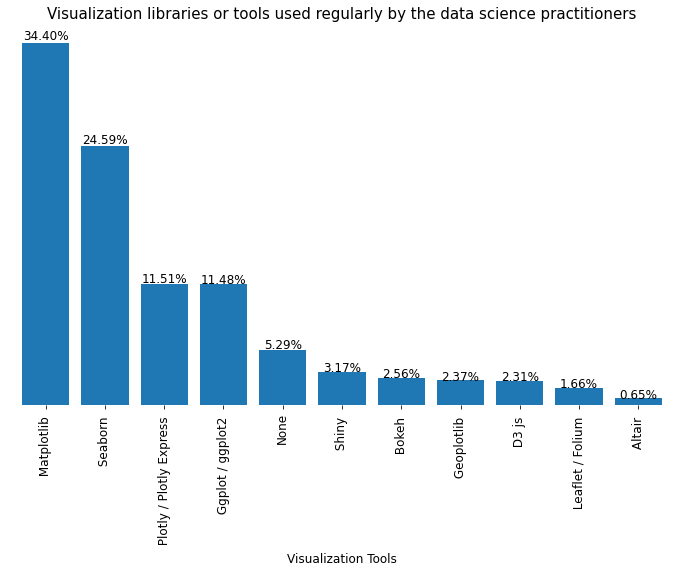

In [38]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Visualization libraries or tools used regularly by the data science practitioners'
bar_plot(data, x_label = 'Visualization Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Matplotlib and Seaborn** are the most popular **visualization libraries** used by the data science practitioners.
- **Plotly and Ggplot** are used almost equally (11.5%) for creating visualizations.

## Q8: For how many years do the data science practitioners have been using machine learning methods?

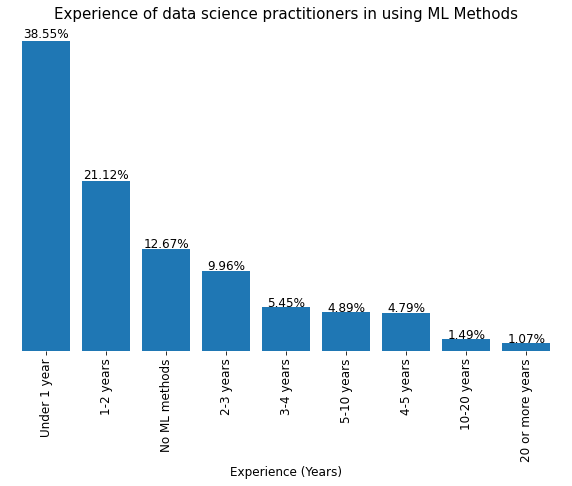

In [39]:
# clean the column value by shortening the string length
df['Q15'] = df['Q15'].replace('I do not use machine learning methods', 'No ML methods')

title = 'Experience of data science practitioners in using ML Methods'
bar_plot(df['Q15'].value_counts(normalize = True), x_label = 'Experience (Years)', title = title, 
         fig_size = (10, 6), spine = True, show_annotations = True)

- The majority of the data science practitioners are new to **Machine Learning methods** and have **less than 2 years of experience**. 
- Very few practitioners have **more than 10 years of experience** in using Machine Learning methods.

## Q9: Which machine learning frameworks do the data science practitioners use on a regular basis?

In [40]:
# columns from Q16_Part_1 to Q16_Part_15 have the entries of machine learning
# frameworks used by the participants on regular basis

data = combine_similar_columns(num_cols = 16, Q_num = 16, cols = ['ML Frameworks', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
ML Frameworks,
Scikit-learn,10250
TensorFlow,6934
Keras,6192
PyTorch,4189
Xgboost,3935
LightGBM,1799
None,1208
CatBoost,957
Caret,939


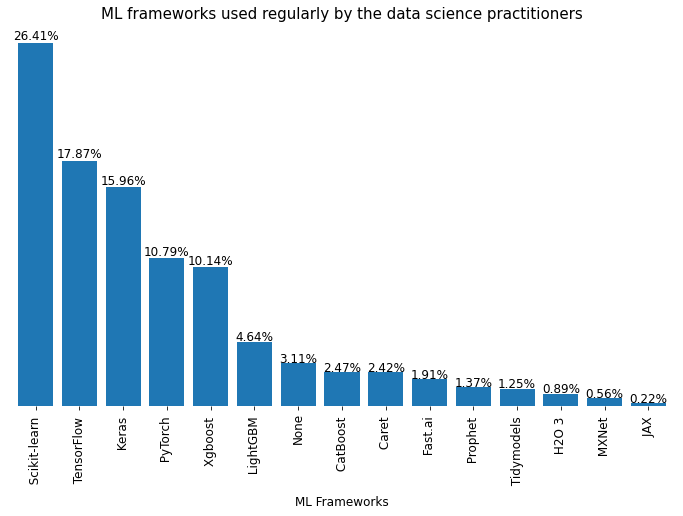

In [41]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'ML frameworks used regularly by the data science practitioners'
bar_plot(data, x_label = 'ML Frameworks', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Scikit-learn** is the most popular machine learning framework among data science practitioners.
- **TensorFlow** is used by 17.87% of the respondents.

## Q10: Which ML algorithms do the data science practitioners use on a regular basis?

In [42]:
# columns from Q17_Part_1 to Q17_Part_11 have the entries of ML algorithms
# used by the participants on regular basis

data = combine_similar_columns(num_cols = 12, Q_num = 17, cols = ['ML Algorithms', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
ML Algorithms,
Linear or Logistic Regression,10560
Decision Trees or Random Forests,8804
Convolutional Neural Networks,5859
"Gradient Boosting Machines (xgboost, lightgbm, etc)",5134
Bayesian Approaches,3647
Recurrent Neural Networks,3468
"Dense Neural Networks (MLPs, etc)",3364
"Transformer Networks (BERT, gpt-3, etc)",1298
Generative Adversarial Networks,1024


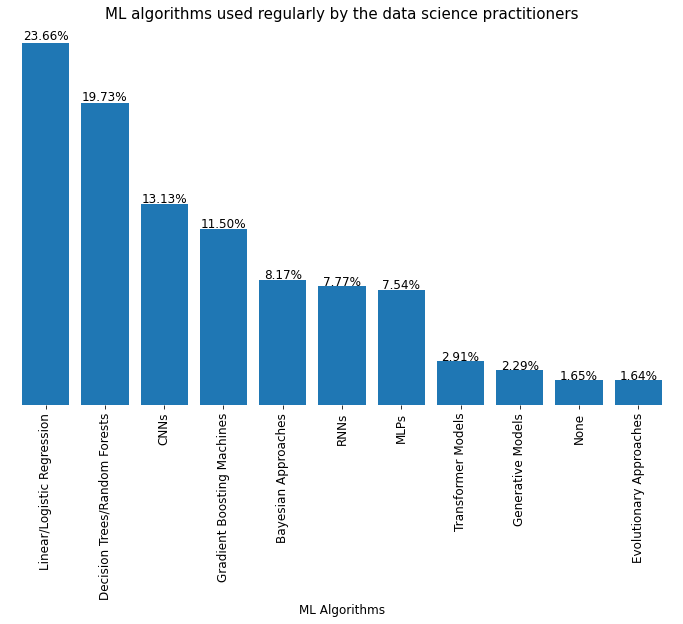

In [43]:
# clean the index of the dataframe
data.index = ['Linear/Logistic Regression', 'Decision Trees/Random Forests', 'CNNs', 
              'Gradient Boosting Machines', 'Bayesian Approaches', 'RNNs', 'MLPs', 
              'Transformer Models', 'Generative Models', 'None', 'Evolutionary Approaches']

# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'ML algorithms used regularly by the data science practitioners'
bar_plot(data, x_label = 'ML Algorithms', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Linear or Logistic Regression** is the most frequently used algorithm by the data science practitioners.
- **Decision Trees or Random Forests** is the second most frequently used algorithm.
- **Evolutionary Approaches** are least used algorithms.

## Q11: Which categories of computer vision methods do the data science practitioners use on a regular basis?

In [44]:
# columns from Q18_Part_1 to Q18_Part_6 have the entries of computer vision
# methods used by the participants on regular basis

data = combine_similar_columns(num_cols = 7, Q_num = 18, cols = ['CV Methods', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
CV Methods,
"Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)",3512
"General purpose image/video tools (PIL, cv2, skimage, etc)",2139
"Object detection methods (YOLOv3, RetinaNet, etc)",2079
"Image segmentation methods (U-Net, Mask R-CNN, etc)",2003
None,1153
"Generative Networks (GAN, VAE, etc)",1092


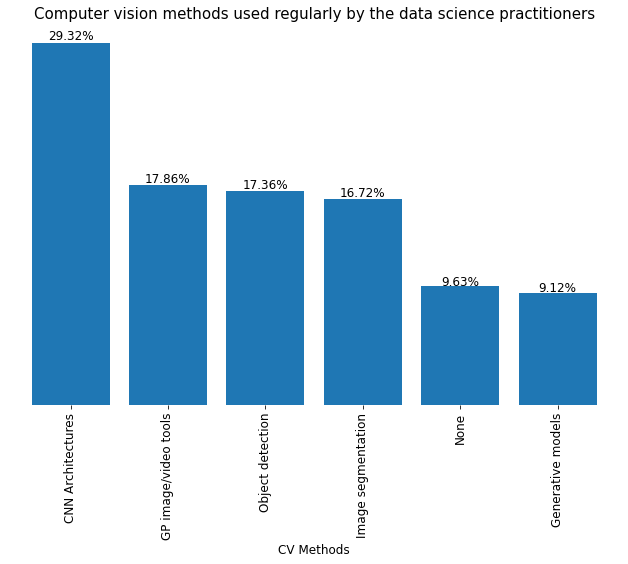

In [45]:
# clean the index of the dataframe by shortening the names of CV methods
data.index = ['CNN Architectures', 'GP image/video tools', 'Object detection', 
              'Image segmentation', 'None', 'Generative models']

# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Computer vision methods used regularly by the data science practitioners'
bar_plot(data, x_label = 'CV Methods', title = title, fig_size = (11, 7), spine = True, 
         show_annotations = True, legend = True)

- **Deep Neural Networks such as VGG, ResNet** are the most frequently used computer vision methods by data science practitioners.
- **Generative Networks** such as VAE and GANs are least popular.

## Q12: Which natural language processing (NLP) methods do the data science practitioners use on a regular basis? 

In [46]:
# columns from Q19_Part_1 to Q19_Part_5 have the entries of NLP
# methods used by the participants on regular basis

data = combine_similar_columns(num_cols = 6, Q_num = 19, cols = ['NLP Methods', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
NLP Methods,
"Word embeddings/vectors (GLoVe, fastText, word2vec)",2110
"Encoder-decorder models (seq2seq, vanilla transformers)",1514
"Transformer language models (GPT-3, BERT, XLnet, etc)",1428
None,1047
"Contextualized embeddings (ELMo, CoVe)",557


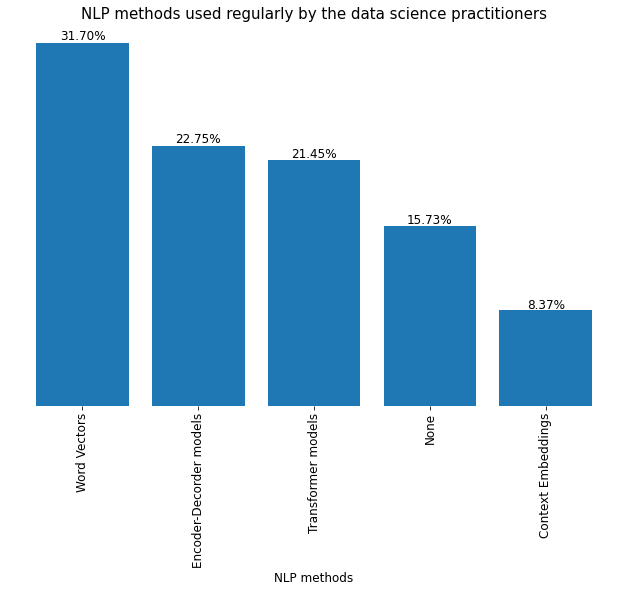

In [47]:
# shorten the names of NLP methods
data.index = ['Word Vectors', 'Encoder-Decorder models', 'Transformer models', 
              'None', 'Context Embeddings']

# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'NLP methods used regularly by the data science practitioners'
bar_plot(data, x_label = 'NLP methods', title = title, fig_size = (11, 7), spine = True, 
         show_annotations = True, legend = True)

- **Word Vectors** is the most frequently used NLP method by data science practitioners. 

## Q13: Which cloud computing platforms do the data science practitioners use on a regular basis?

In [48]:
# columns from Q26_A_Part_1 to Q26_A_Part_11 have the entries of cloud computing
# platforms used by the participants on regular basis

data = combine_similar_columns(num_cols = 12, Q_num = 26, cols = ['Cloud Computing Platforms', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Cloud Computing Platforms,
Amazon Web Services (AWS),2806
Google Cloud Platform (GCP),2286
None,1837
Microsoft Azure,1705
IBM Cloud / Red Hat,441
Oracle Cloud,286
VMware Cloud,248
Salesforce Cloud,192
SAP Cloud,169


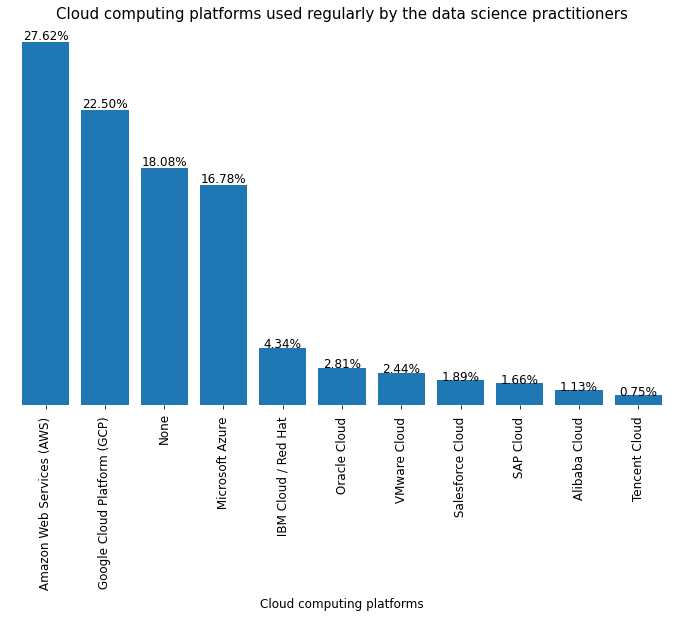

In [49]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Cloud computing platforms used regularly by the data science practitioners'
bar_plot(data, x_label = 'Cloud computing platforms', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **AWS followed by GCP** are the most frequently used cloud computing platforms used by the data science practitioners.

## Q14: Which cloud computing products do the data science practitioners use on a regular basis?

In [50]:
# columns from Q27_A_Part_1 to Q27_A_Part_11 have the entries of cloud computing
# products used by the participants on regular basis

data = combine_similar_columns(num_cols = 12, Q_num = 27, cols = ['Cloud Computing Products', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Cloud Computing Products,
Amazon EC2,1651
No / None,1082
Google Cloud Compute Engine,1015
AWS Lambda,949
Azure Cloud Services,856
Google Cloud Functions,651
Google Cloud App Engine,621
Amazon Elastic Container Service,615
Microsoft Azure Container Instances,505


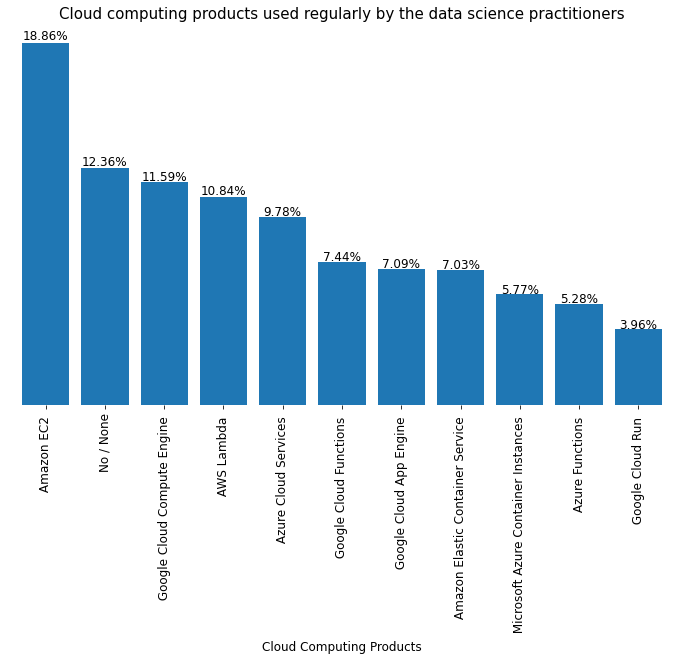

In [51]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Cloud computing products used regularly by the data science practitioners'
bar_plot(data, x_label = 'Cloud Computing Products', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Amazon EC2** is the most popular cloud computing product among the data science practitioners.

## Q15: Which machine learning products do the data science practitioners use on a regular basis?

In [52]:
# columns from Q28_A_Part_1 to Q28_A_Part_10 have the entries of machine learning
# products used by the participants on regular basis

data = combine_similar_columns(num_cols = 11, Q_num = 28, cols = ['ML Products', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
ML Products,
No / None,2573
Google Cloud AI Platform / Google Cloud ML Engine,722
Amazon SageMaker,612
Azure Machine Learning Studio,542
Google Cloud Vision AI,446
Google Cloud Natural Language,386
Azure Cognitive Services,306
Google Cloud Video AI,233
Amazon Rekognition,223


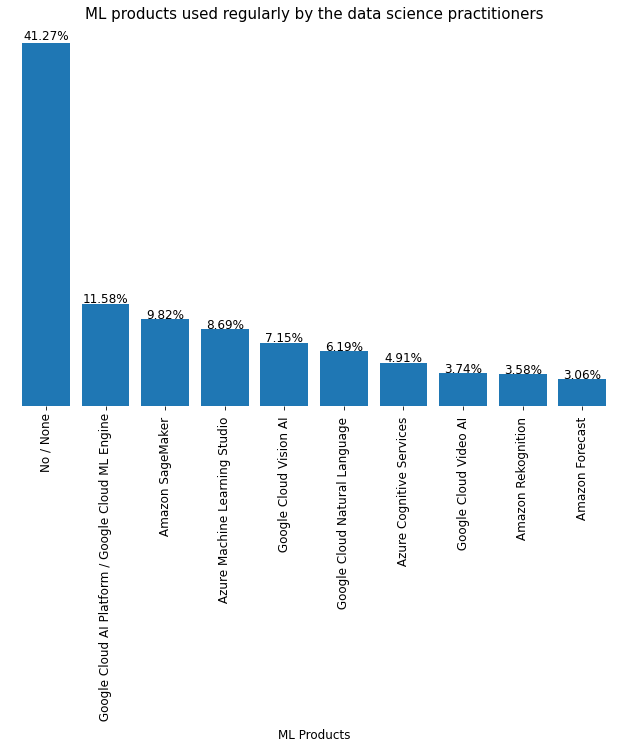

In [53]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'ML products used regularly by the data science practitioners'
bar_plot(data, x_label = 'ML Products', title = title, fig_size = (11, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners do not use any ML product.
- **Google Cloud AI Platform/ML Engine** and **Amazon SageMaker** are used by a small number of practitioners.

## Q16: Which big data products (relational databases, data warehouses, data lakes, or similar) do the data science practitioners use on a regular basis?

In [54]:
# columns from Q29_A_Part_1 to Q29_Part_A_17 have the entries of databases,
# data lakes used by the participants on regular basis

data = combine_similar_columns(num_cols = 18, Q_num = 29, cols = ['Big Data Products', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Big Data Products,
MySQL,2488
PostgresSQL,1675
Microsoft SQL Server,1558
None,1494
MongoDB,1264
SQLite,1176
Oracle Database,956
Google Cloud BigQuery,669
Microsoft Access,465


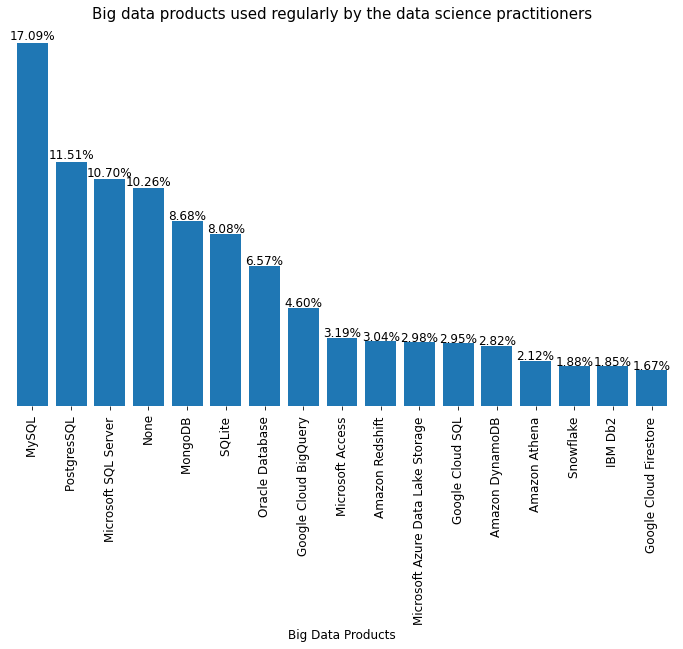

In [55]:
# normalize count data
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Big data products used regularly by the data science practitioners'
bar_plot(data, x_label = 'Big Data Products', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **MySQL** is the most popular big data product among data science practitioners. 
- **IBM Db2 and Google Cloud Firestore** are the least popular big data products.

## Q17: Which business intelligence tools do the data science practitioners use on a regular basis?

In [56]:
# columns from Q31_A_Part_1 to Q31_A_Part_14 have the entries of business
# intelligence used by the participants on regular basis

data = combine_similar_columns(num_cols = 15, Q_num = 31, cols = ['Business Intelligence Tools', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Business Intelligence Tools,
None,3065
Tableau,1834
Microsoft Power BI,1648
Google Data Studio,628
Qlik,318
Salesforce,270
Amazon QuickSight,172
SAP Analytics Cloud,170
Alteryx,160


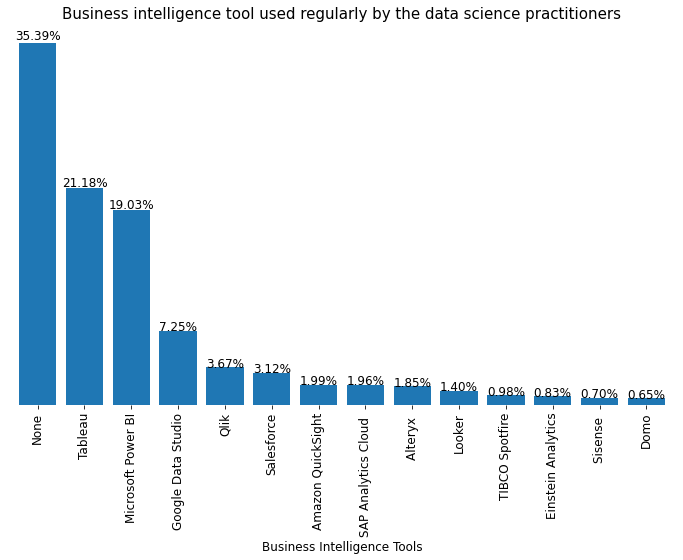

In [57]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Business intelligence tool used regularly by the data science practitioners'
bar_plot(data, x_label = 'Business Intelligence Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **The majority of data science practitioners don't use any business intelligence tool**.
- **Tableau and Microsoft Power BI** are used by a significant number of practitioners.

### Q18: Do the data science practitioners use any automated machine learning tools (or partial AutoML tools) on a regular basis?

In [58]:
# columns from Q33_A_Part_1 to Q33_A_Part_7 have the entries of AutoML tool types
# used by the participants on regular basis

data = combine_similar_columns(num_cols = 8, Q_num = 33, cols = ['AutoML Tool Types', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
AutoML Tool Types,
No / None,4679
"Automated model selection (e.g. auto-sklearn, xcessiv)",815
"Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)",681
"Automated data augmentation (e.g. imgaug, albumentations)",654
"Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)",582
"Automated feature engineering/selection (e.g. tpot, boruta_py)",526
"Automated model architecture searches (e.g. darts, enas)",224


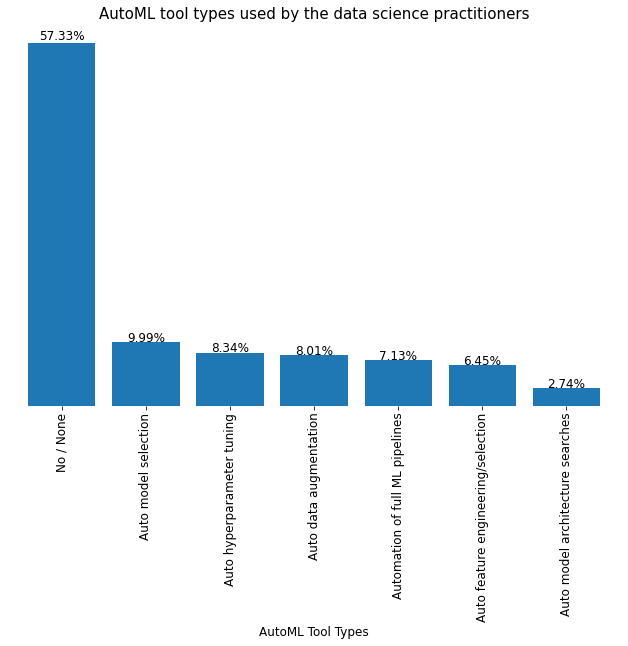

In [59]:
# shorten the names of AutoML Tool Types
data.index = ['No / None', 'Auto model selection', 'Auto hyperparameter tuning', 'Auto data augmentation',
              'Automation of full ML pipelines', 'Auto feature engineering/selection', 'Auto model architecture searches']

data['Count'] = data['Count'] / sum(data['Count'])

title = 'AutoML tool types used by the data science practitioners'
bar_plot(data, x_label = 'AutoML Tool Types', title = title, fig_size = (11, 7), spine = True, 
         show_annotations = True, legend = True)

## Q19: Which automated machine learning tools (or partial AutoML tools) do the data science practitioners use on a regular basis?

In [60]:
# columns from Q34_A_Part_1 to Q34_A_Part_11 have the entries of AutoML tools
# used by the participants on regular basis

data = combine_similar_columns(num_cols = 12, Q_num = 34, cols = ['Auto ML Tools', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Auto ML Tools,
No / None,643
Auto-Sklearn,582
Auto-Keras,417
Google Cloud AutoML,361
Auto_ml,287
H20 Driverless AI,162
DataRobot AutoML,151
Databricks AutoML,147
Tpot,120


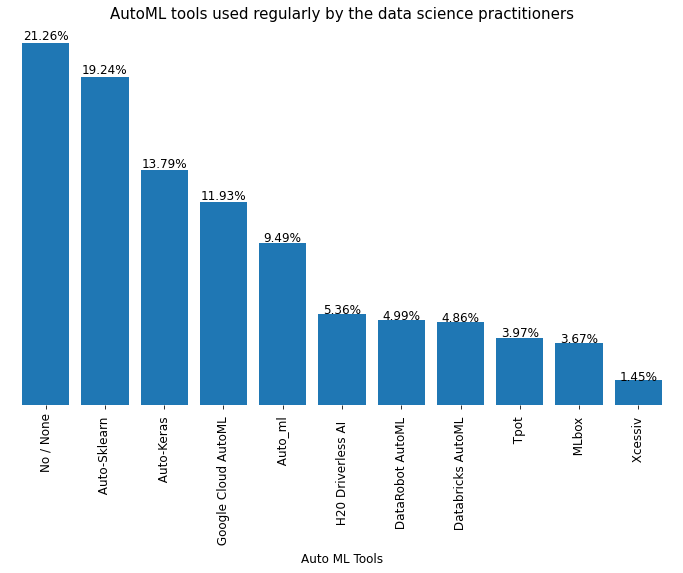

In [61]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'AutoML tools used regularly by the data science practitioners'
bar_plot(data, x_label = 'Auto ML Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

## Q20: Which tools do the data science practitioners use to manage machine learning experiments?

In [62]:
# columns from Q35_A_Part_1 to Q35_A_Part_10 have the entries of tools to manage
# machine learning experiments

data = combine_similar_columns(num_cols = 11, Q_num = 35, cols = ['Tools', 'Count'], char = 'A')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Tools,
No / None,4732
TensorBoard,1325
Weights & Biases,371
Trains,211
Neptune.ai,149
Polyaxon,87
Domino Model Monitor,74
Comet.ml,70
Guild.ai,66


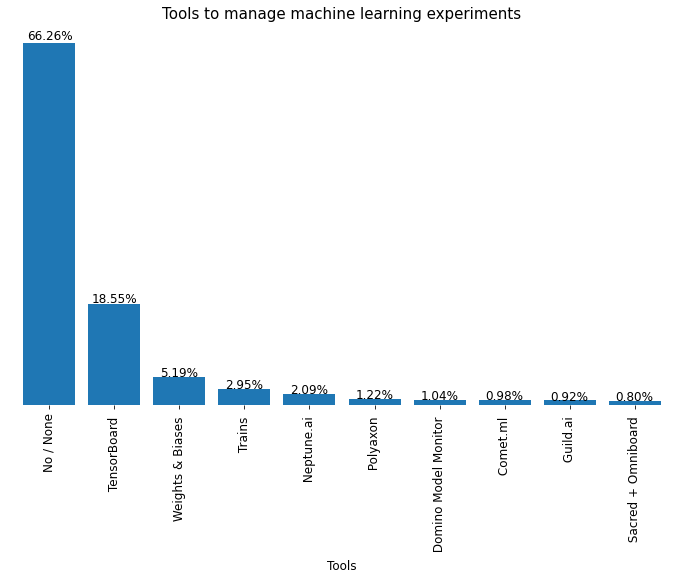

In [63]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Tools to manage machine learning experiments'
bar_plot(data, x_label = 'Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **The majority of data science practitioners don't use any tool to manage machine learning experiments**.
- **TensorBoard** is used by a small number of practitioners.

## Q21: Where do the data science practitioners publicly share or deploy data analysis or machine learning applications?

In [64]:
# columns from Q36_Part_1 to Q36_Part_9 have the entries of deployment
# of machine learning applications

data = combine_similar_columns(num_cols = 10, Q_num = 36, cols = ['Deployment', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Deployment,
GitHub,3434
I do not share my work publicly,2317
Kaggle,1878
Colab,1247
Personal blog,527
Shiny,332
Plotly Dash,227
Streamlit,186
NBViewer,92


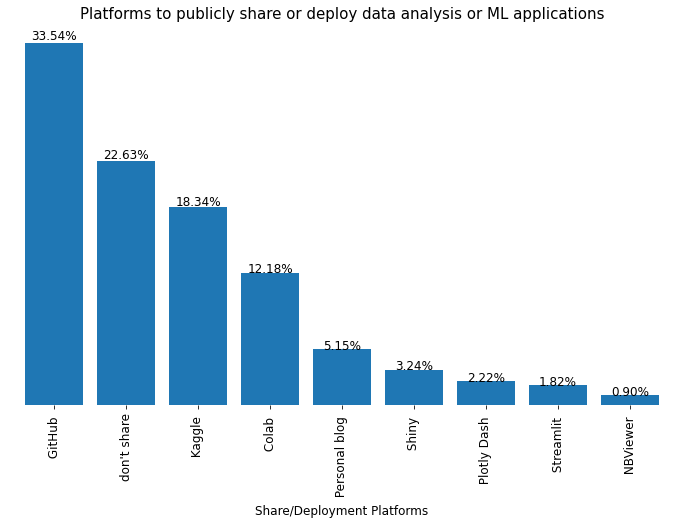

In [65]:
# replace the index 'I do not share my work publicly' with "don't share" 
data.rename(index = {'I do not share my work publicly': "don't share"}, inplace = True)

data['Count'] = data['Count'] / sum(data['Count'])

title = 'Platforms to publicly share or deploy data analysis or ML applications'
bar_plot(data, x_label = 'Share/Deployment Platforms', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **GitHub** is the most popular platform for sharing machine learning applications.

## Q22: On which platforms did data science practitioners have begun or completed data science courses?

In [66]:
# clean the column values by shortening the names
df['Q37_Part_10'] = df['Q37_Part_10'].str.split('(').str[0]
df['Q37_Part_9'] = df['Q37_Part_9'].str.split('(').str[0]

In [67]:
# columns from Q37_Part_1 to Q37_Part_11 have the entries of data science
# platforms used by the participants

data = combine_similar_columns(num_cols = 12, Q_num = 37, cols = ['Platforms', 'Count'])
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Platforms,
Coursera,7382
Kaggle Learn Courses,4843
Udemy,4626
University Courses,3568
DataCamp,3032
edX,2498
Udacity,2056
LinkedIn Learning,1617
None,1306


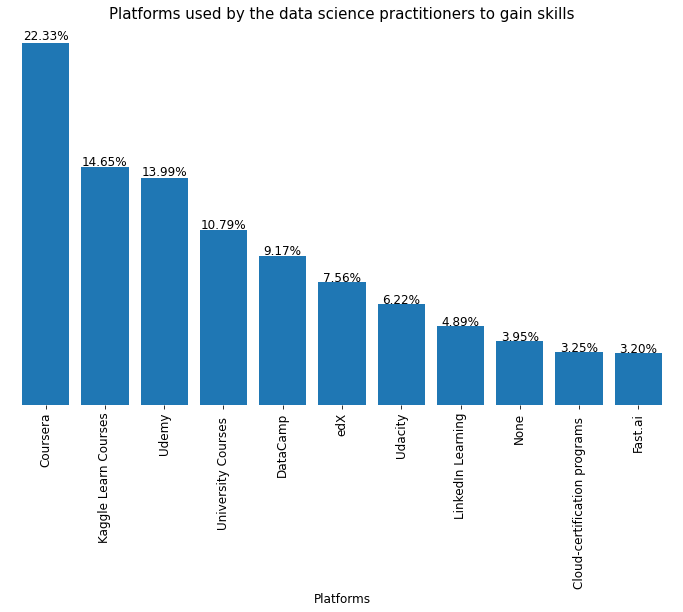

In [68]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Platforms used by the data science practitioners to gain skills'
bar_plot(data, x_label = 'Platforms', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- **Coursera** is the most popular platform for learning data science skills followed by **Kaggle Learn Courses**.

## Part 3: This section contains information about the skills which data science practitioners want to acquire in the coming next 2 years   

## Q1: Which cloud computing platforms do you hope to become more familiar with within the next 2 years?


In [69]:
# columns from Q26_B_Part_1 to Q26_B_Part_11
data = combine_similar_columns(num_cols = 12, Q_num = 26, cols = ['Cloud Computing Platforms', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Cloud Computing Platforms,
Amazon Web Services (AWS),5236
Google Cloud Platform (GCP),5146
Microsoft Azure,3779
IBM Cloud / Red Hat,1746
None,1324
Oracle Cloud,1060
SAP Cloud,579
VMware Cloud,481
Alibaba Cloud,424


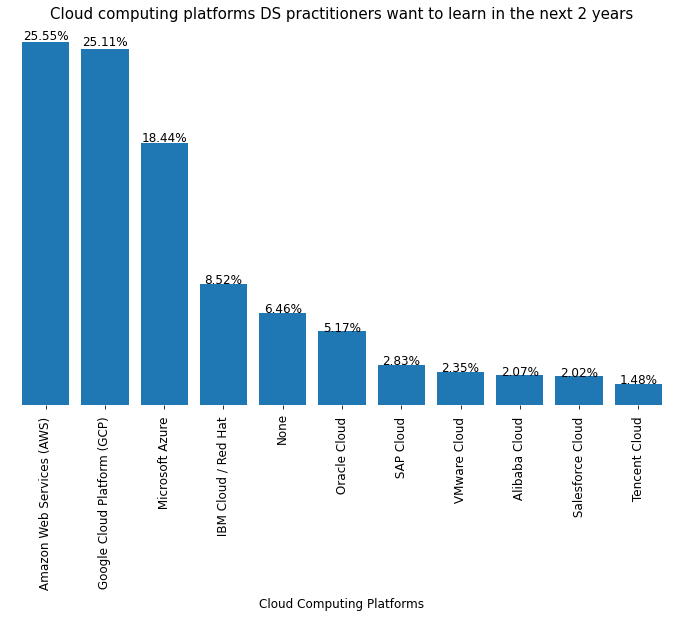

In [70]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Cloud computing platforms DS practitioners want to learn in the next 2 years'
bar_plot(data, x_label = 'Cloud Computing Platforms', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **AWS & GCP** in the next 2 years.

## Q2: Which cloud computing products do you hope to become more familiar with within the next 2 years?

In [71]:
# columns from Q27_B_Part_1 to Q27_B_Part_11
data = combine_similar_columns(num_cols = 12, Q_num = 27, cols = ['Cloud Computing Products', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Cloud Computing Products,
Google Cloud Compute Engine,3252
Google Cloud Functions,2650
AWS Lambda,2499
Azure Cloud Services,2488
Google Cloud App Engine,2462
Amazon EC2,2376
Google Cloud Run,1972
Microsoft Azure Container Instances,1841
Azure Functions,1783


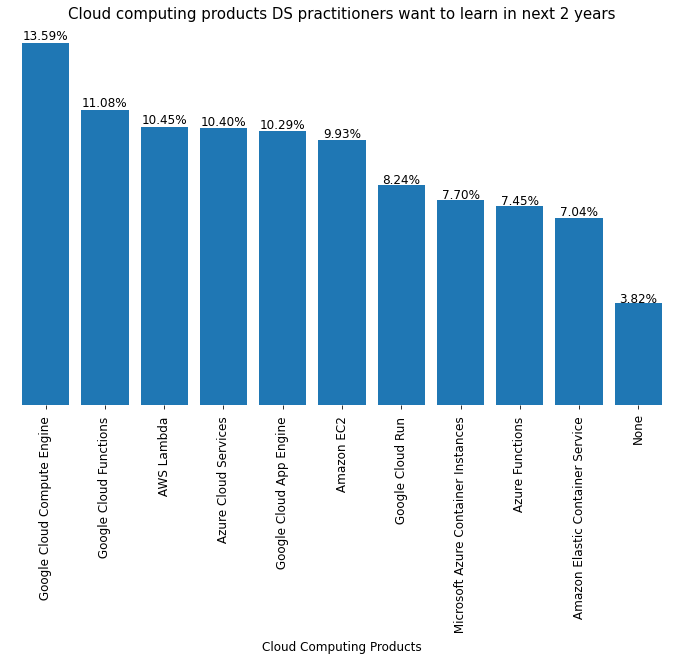

In [72]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Cloud computing products DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'Cloud Computing Products', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **Google Cloud Compute Engine and Google Cloud Functions** in the next 2 years.

## Q3: Which specific machine learning products do you hope to become more familiar with within the next 2 years?

In [73]:
# columns from Q28_B_Part_1 to Q28_B_Part_10 
data = combine_similar_columns(num_cols = 11, Q_num = 28, cols = ['Specific ML Products', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Specific ML Products,
Google Cloud AI Platform / Google Cloud ML Engine,3382
Google Cloud Vision AI,2838
Google Cloud Natural Language,2757
Azure Machine Learning Studio,2440
Google Cloud Video AI,2043
Amazon SageMaker,1702
Amazon Forecast,1643
Amazon Rekognition,1399
Azure Cognitive Services,1393


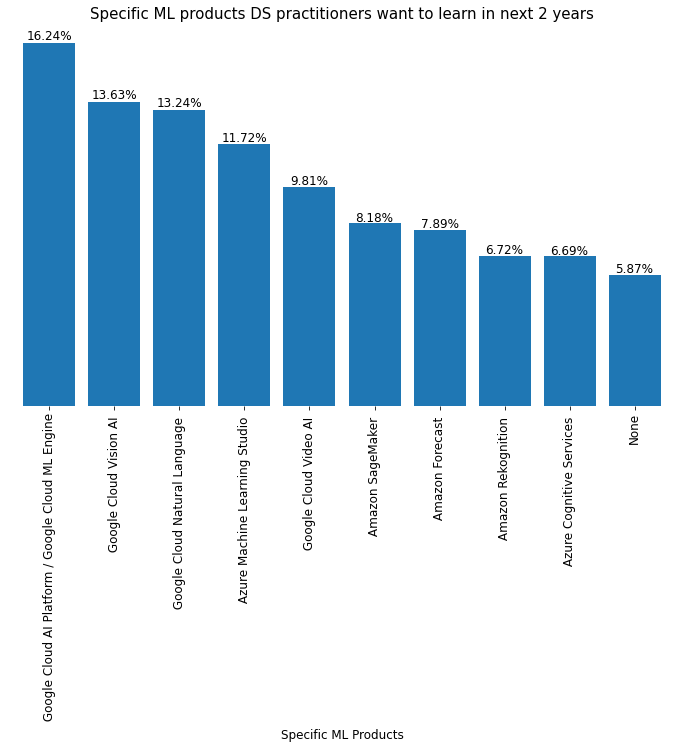

In [74]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Specific ML products DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'Specific ML Products', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **Google Cloud AI Platform/Google Cloud ML Engine and Google Cloud Vision AI** in the next 2 years.

## Q4: Which big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with within the next 2 years?

In [75]:
# columns from Q29_B_Part_1 to Q29_B_Part_17 
data = combine_similar_columns(num_cols = 18, Q_num = 29, cols = ['Big Data Products', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Big Data Products,
MySQL,4101
MongoDB,3064
PostgresSQL,2136
SQLite,2102
Google Cloud SQL,2025
Microsoft SQL Server,1964
Google Cloud BigQuery,1854
Oracle Database,1510
None,1278


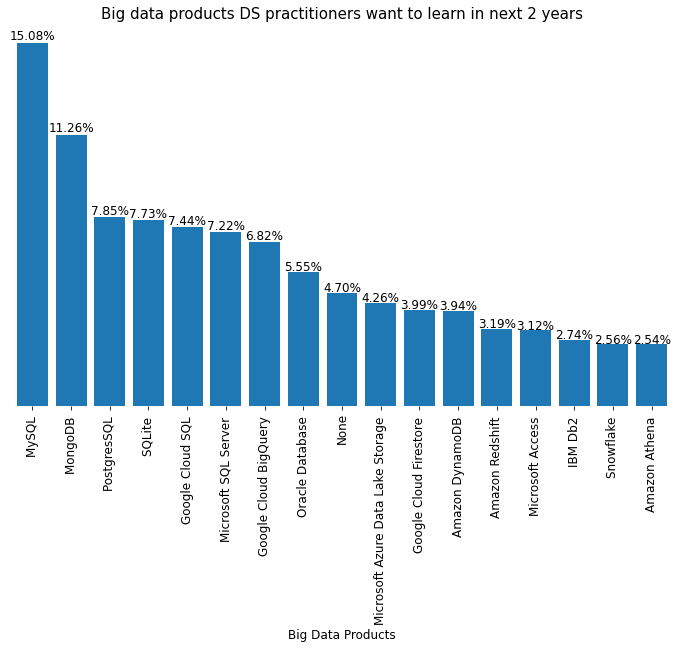

In [76]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Big data products DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'Big Data Products', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **MySQL & MongoDB** in the next 2 years.

## Q5: Which business intelligence tools do you hope to become more familiar with within the next 2 years?

In [77]:
# columns from Q31_B_Part_1 to Q31_B_Part_14 
data = combine_similar_columns(num_cols = 15, Q_num = 31, cols = ['Business Intelligence Tools', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Business Intelligence Tools,
Tableau,3742
Microsoft Power BI,3143
Google Data Studio,2589
None,2115
SAP Analytics Cloud,1006
Amazon QuickSight,906
Salesforce,819
Qlik,577
Einstein Analytics,556


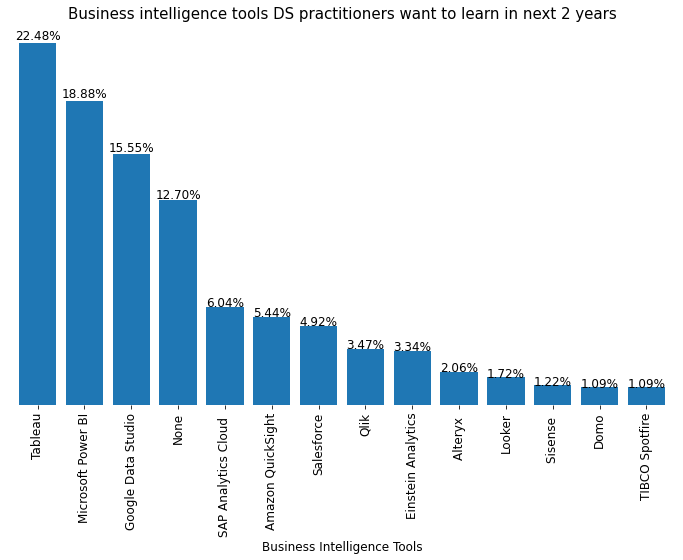

In [78]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Business intelligence tools DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'Business Intelligence Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **Tableau & Microsoft Power BI** in the next 2 years.

## Q6: Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with within the next 2 years? 

In [79]:
# columns from Q33_B_Part_1 to Q33_B_Part_7
data = combine_similar_columns(num_cols = 8, Q_num = 33, cols = ['AutoML Tools', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
AutoML Tools,
"Automated model selection (e.g. auto-sklearn, xcessiv)",3274
"Automation of full ML pipelines (e.g. Google Cloud AutoML, H20 Driverless AI)",3161
"Automated feature engineering/selection (e.g. tpot, boruta_py)",2540
"Automated data augmentation (e.g. imgaug, albumentations)",2428
"Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)",2397
None,2108
"Automated model architecture searches (e.g. darts, enas)",1510


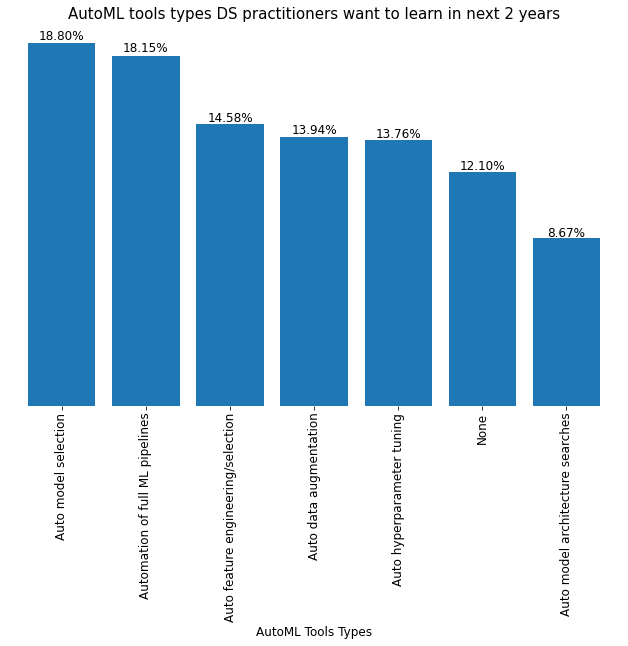

In [80]:
# shorten the names of AutoML Tool Types
data.index = ['Auto model selection', 'Automation of full ML pipelines', 'Auto feature engineering/selection', 
              'Auto data augmentation', 'Auto hyperparameter tuning', 'None', 'Auto model architecture searches']

data['Count'] = data['Count'] / sum(data['Count'])

title = 'AutoML tools types DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'AutoML Tools Types', title = title, fig_size = (11, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **Automated model selection and Automation of full ML pipelines** in the next 2 years.

## Q7: Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with within the next 2 years?

In [81]:
# columns from Q34_B_Part_1 to Q34_B_Part_11
data = combine_similar_columns(num_cols = 12, Q_num = 34, cols = ['Specific AutoML Tools', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Specific AutoML Tools,
Auto-Sklearn,2752
Google Cloud AutoML,2479
Auto-Keras,2384
Auto_ml,1348
H20 Driverless AI,859
DataRobot AutoML,833
None,804
Databricks AutoML,801
MLbox,707


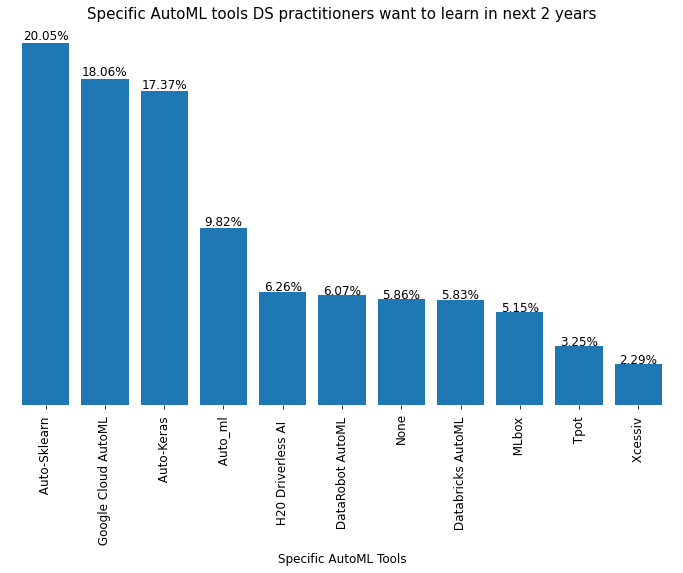

In [82]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'Specific AutoML tools DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'Specific AutoML Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **Auto-Sklearn and Google Cloud AutoML** in the next 2 years.

## Q8: In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?

In [83]:
# columns from Q35_B_Part_1 to Q35_B_Part_10 
data = combine_similar_columns(num_cols = 11, Q_num = 35, cols = ['Tools', 'Count'], char = 'B')
data.sort_values(by = 'Count', ascending = False, inplace = True)
data

,Count
Tools,
TensorBoard,3199
None,3082
Weights & Biases,1177
Neptune.ai,935
Trains,846
Guild.ai,557
Domino Model Monitor,519
Comet.ml,494
Polyaxon,480


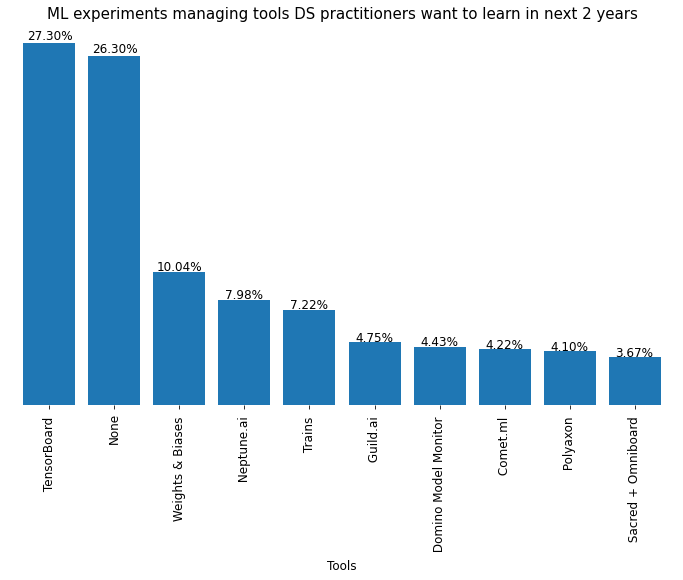

In [84]:
data['Count'] = data['Count'] / sum(data['Count'])

title = 'ML experiments managing tools DS practitioners want to learn in next 2 years'
bar_plot(data, x_label = 'Tools', title = title, fig_size = (12, 7), spine = True, 
         show_annotations = True, legend = True)

- The majority of data science practitioners want to become more familiar with **TensorBoard** in the next 2 years.

## Part 4: Bivariate Analysis on specific columns

In [85]:
# create new dataframe with columns that have less than 50% missing values
df_final = df[df.columns[~(df.isnull().sum() / len(df) > 0.5)]]

# change the column names
cols = ['time_duration', 'age_group', 'gender', 'country', 'education', 'job_title', 'coding_exp', 'language_used', 
        'recommended_language', 'IDE_used', 'cloud_platform_used', 'TPU_use_freq', 'vis_tool_used', 'ML_experience', 
        'ML_framework_used', 'ML_algorithm_used','company_size', 'team_size', 'is_ML_used', 'salary', 'money_spent_on_ML', 
        'data_analysis_tool']


# set the column names
df_final.columns = cols

# display head of the dataframe
df_final.head()

,time_duration,age_group,gender,country,education,job_title,coding_exp,language_used,recommended_language,IDE_used,cloud_platform_used,TPU_use_freq,vis_tool_used,ML_experience,ML_framework_used,ML_algorithm_used,company_size,team_size,is_ML_used,salary,money_spent_on_ML,data_analysis_tool
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,Python,Jupyter,cloud_services,2-5 times,Matplotlib,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
2,289287,30-34,Man,USA,Master’s degree,Data Engineer,5-10 years,Python,Python,NaN,PC/Laptop,2-5 times,Matplotlib,1-2 years,Scikit-learn,Linear or Logistic Regression,"10,000 or more employees",20+,"We have well established ML methods (i.e., models in production for more than 2 years)","100,000-124,999","$100,000 or more ($USD)","Business intelligence software (Salesforce, Tableau, Spotfire, etc.)"
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,R,NaN,PC/Laptop,Never,NaN,No ML methods,NaN,NaN,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),"Basic statistical software (Microsoft Excel, Google Sheets, etc.)"
4,507,30-34,Man,USA,Master’s degree,Data Scientist,5-10 years,Python,Python,NaN,cloud_services,2-5 times,Matplotlib,3-4 years,Scikit-learn,Linear or Logistic Regression,250-999 employees,5-9,"We have well established ML methods (i.e., models in production for more than 2 years)","125,000-149,999","$10,000-$99,999","Local development environments (RStudio, JupyterLab, etc.)"
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Number of unique values in each column
df_final.apply(pd.Series.nunique)

time_duration           4195
age_group                 11
gender                     3
country                   55
education                  7
job_title                 13
coding_exp                 7
language_used              1
recommended_language      13
IDE_used                   1
cloud_platform_used        5
TPU_use_freq               5
vis_tool_used              1
ML_experience              9
ML_framework_used          1
ML_algorithm_used          1
company_size               5
team_size                  7
is_ML_used                 6
salary                    25
money_spent_on_ML          6
data_analysis_tool         6
dtype: int64

In [87]:
# drop the columns that has single unique value as these columns don't have any information
df_final.drop(['language_used', 'IDE_used', 'vis_tool_used', 'ML_framework_used', 'ML_algorithm_used'], 
              axis = 1, inplace = True)

In [88]:
# Check for null values in the dataframe
df_final.isnull().sum()

time_duration              0
age_group                  0
gender                     0
country                    0
education                467
job_title                759
coding_exp               916
recommended_language    2215
cloud_platform_used     3007
TPU_use_freq            3256
ML_experience           3662
company_size            8633
team_size               8754
is_ML_used              8906
salary                  9307
money_spent_on_ML       9466
data_analysis_tool      6746
dtype: int64

- There are lots of null values in most of the columns. Need to impute them for modeling.

### Remove the rows with missing salary values from the dataframe as salary will be the target variable

In [89]:
df_final = df_final.dropna(subset = ['salary'], axis = 0)

# check the number of null values in each column
df_final.isnull().sum()

time_duration              0
age_group                  0
gender                     0
country                    0
education                  0
job_title                  0
coding_exp                 0
recommended_language     561
cloud_platform_used      561
TPU_use_freq             561
ML_experience            561
company_size               0
team_size                  0
is_ML_used                 0
salary                     0
money_spent_on_ML        159
data_analysis_tool      1253
dtype: int64

In [90]:
# Drop the columns time_duration, recommended_language, cloud_platform_used, TPU_use_freq,
# money_spent_on_ML and data_analysis_tool as salary won't depend on these features

df_final.drop(['recommended_language', 'TPU_use_freq', 'money_spent_on_ML', 
               'time_duration', 'data_analysis_tool', 'cloud_platform_used'], 
              axis = 1, inplace = True)

# 4. Data cleaning and categorization 

In [91]:
# Check unique values in education column
df_final.education.value_counts()

Master’s degree        4879
Bachelor’s degree      3013
Doctoral degree        1718
Professional degree     470
No Bachelor degree      385
Not answered            158
High School             106
Name: education, dtype: int64

- We can combine the education status that do not have any degree associated with it and whose count is low.

In [92]:
# combine below listed education categories into a separate category called other_edu
other_edu = ['No Bachelor degree',
             'Not answered', 
             'High School']

def group_education(education_status):
    """
    This function will make a separate category called Other for the education status 
    listed in other_edu list.
    """
    
    if education_status in other_edu:
        return 'other_edu'
    
    else:
        return education_status

    
# apply the function to the education column
df_final['education'] = df_final['education'].apply(group_education)

In [93]:
# categorize the salary column into four categories: very low, low, medium and high
# This salary categorization is done based on the salary of data scientists in USA.

df_final['salary'] = df_final['salary'].map({ # very low salary category
                                             '$0-999': 'very low', '1,000-1,999': 'very low', '2,000-2,999': 'very low', 
                                             '3,000-3,999': 'very low', '4,000-4,999': 'very low', '5,000-7,499': 'very low',
                                             '7,500-9,999': 'very low', '10,000-14,999': 'very low',
                                             
                                             # low salary category
                                             '15,000-19,999': 'low', '20,000-24,999': 'low', '25,000-29,999': 'low', 
                                             '30,000-39,999': 'low', '40,000-49,999': 'low', 
                                            
                                             # medium salary category
                                             '50,000-59,999': 'medium', '60,000-69,999': 'medium', '70,000-79,999': 'medium',
                                             '80,000-89,999': 'medium', '90,000-99,999': 'medium',   
                                             
                                             # high salary category
                                             '100,000-124,999': 'high', '125,000-149,999': 'high', '150,000-199,999': 'high', 
                                             '200,000-249,999': 'high', '250,000-299,999': 'high', 
                                             '300,000-500,000': 'high', '> $500,000': 'high' 
                                             })

In [94]:
# Check unique values in job_title column
df_final.job_title.value_counts()

Data Scientist               2398
Software Engineer            1620
Other                        1508
Data Analyst                 1260
Research Scientist           1028
Machine Learning Engineer     918
Business Analyst              678
Product/Project Manager       590
Data Engineer                 369
Statistician                  248
DBA/Database Engineer         112
Name: job_title, dtype: int64

In [95]:
def group_job_title(jobTitle):
    """
    This function will group job titles into different categories by clubing the existing job titles.
    Mapping is as follows:
       Machine Learning Engineer, Data Engineer, DBA/Database Engineer ---> ML/Data/DB Engineeer
       Statistician, Product/Project Manager, Research Scientist, Other ---> Other Job Titles
       Data Analyst, Business Analyst ---> Analyst
    """
    
    if jobTitle in ['Data Analyst', 'Business Analyst']:
        return 'Analyst'
    
    elif jobTitle in ['Machine Learning Engineer', 'Data Engineer', 'DBA/Database Engineer']:
        return 'ML/Data/DB Engineeer'
    
    elif jobTitle in ['Statistician', 'Product/Project Manager', 'Research Scientist', 'Other']:
        return 'Other Job Titles'
    
    else:
        return jobTitle
    
    
# apply the above function to the job_title column
df_final['job_title'] = df_final['job_title'].apply(group_job_title)

In [96]:
# Check unique values in company_size column
df_final.company_size.value_counts()

0-49 employees              3876
10,000 or more employees    2117
1000-9,999 employees        1843
50-249 employees            1598
250-999 employees           1295
Name: company_size, dtype: int64

In [97]:
# map the company size based on the number of employees
df_final['company_size'] = df_final['company_size'].map({'0-49 employees': 'small_comp', '50-249 employees': 'small_comp',
                                                         '250-999 employees': 'medium_comp', 
                                                         '1000-9,999 employees': 'medium_comp',
                                                         '10,000 or more employees': 'large_comp'
                                                        })

In [98]:
# Check unique values in team_size column
df_final.team_size.value_counts()

1-2      2526
20+      2151
0        2121
3-4      1708
5-9      1263
10-14     665
15-19     295
Name: team_size, dtype: int64

In [99]:
# map the column team_size into small, medium and large team
# 0 - 4 ---> small_team, 5 - 19 ---> medium_team, 20+ ---> large_team
df_final['team_size'] = df_final['team_size'].map({'0': 'small_team', '1-2': 'small_team', '3-4': 'small_team',
                                                   '5-9': 'medium_team', '10-14': 'medium_team', '15-19': 'medium_team',
                                                   '20+': 'large_team'})

In [100]:
# Check unique values in is_ML_used column
df_final.is_ML_used.value_counts()

We are exploring ML methods (and may one day put a model into production)                    2285
No (we do not use ML methods)                                                                2136
We have well established ML methods (i.e., models in production for more than 2 years)       1872
We recently started using ML methods (i.e., models in production for less than 2 years)      1749
I do not know                                                                                1469
We use ML methods for generating insights (but do not put working models into production)    1218
Name: is_ML_used, dtype: int64

In [101]:
# Map the column is_ML_used to Yes, No or unknown
mapping = {'We have well established ML methods (i.e., models in production for more than 2 years)': 'Yes',
           'No (we do not use ML methods)':'No',
           'We use ML methods for generating insights (but do not put working models into production)': 'Yes',
           'We are exploring ML methods (and may one day put a model into production)': 'No',
           'We recently started using ML methods (i.e., models in production for less than 2 years)': 'Yes',
           'I do not know': 'unknown'}

df_final['is_ML_used'] = df_final['is_ML_used'].map(mapping)

In [102]:
def group_age_column(age_gp):
    """
    This function will club different age groups together.
       Mapping criteria:
       ['40-44', '45-49', '50-54', '55-59', '55-59', '70+'] ---> 40+
       ['25-29', '30-34', '35-39'] ---> '25-40'
       ['18-21', '22-24'] ---> 'below_25'
    """
    
    if age_gp in ['40-44', '45-49', '50-54', '55-59', '55-59', '70+']:
        return '40+'
    
    elif age_gp in ['18-21', '22-24']:
        return 'below_25'
    
    else:
        return '25-40'

In [103]:
# Check unique values in coding_exp column
df_final.coding_exp.value_counts()

3-5 years      2444
1-2 years      1908
5-10 years     1901
10-20 years    1488
< 1 years      1281
20+ years      1146
Never coded     561
Name: coding_exp, dtype: int64

In [104]:
def group_coding_exp(exp_years):
    """
    This function will group the coding experience of data science practitioners in 3 groups
    Mapping is as follows:
        I have never written code, < 1 years, 1-2 years, 3-5 years ---> below 5 years
        5-10 years, 10-20 years ---> 5-20 years
        20+ years ---> 20+ years
    """
    
    if exp_years == '20+ years':
        return exp_years
    
    elif exp_years == '5-10 years' or  exp_years == '10-20 years':
        return '5-20 years'
    
    elif (exp_years == '< 1 years' or exp_years == '1-2 years' or 
         exp_years == '3-5 years' or exp_years == 'I have never written code'):
        return 'upto 5 years'
    
    else:
        return exp_years

In [105]:
# Check unique values in ML_experience column
df_final.ML_experience.value_counts()

Under 1 year        3038
1-2 years           2223
2-3 years           1248
No ML methods       1055
3-4 years            772
5-10 years           746
4-5 years            693
10-20 years          229
20 or more years     164
Name: ML_experience, dtype: int64

In [106]:
def group_ML_exp(exp_years):
    """
    This function will group the ML experience of data science practitioners in 4 groups
    Mapping is as follows:
        Under 1 year, 1-2 years, 2-3 years, 3-4 years, 4-5 years ---> upto 5 years exp
        I do not use machine learning methods ---> 'no_ML'
        5-10 years, 10-20 years ---> 5-20 years exp
        20 or more years ---> 20+ years exp
    """
    
    if exp_years == '20 or more years':
        return '20+ years exp'
    
    elif exp_years == '5-10 years' or  exp_years == '10-20 years':
        return '5-20 years exp'
    
    elif (exp_years == 'Under 1 year' or exp_years == '1-2 years' or 
         exp_years == '2-3 years' or exp_years == '3-4 years' or exp_years == '4-5 years'):
        return 'upto 5 years exp'
    
    elif exp_years == 'I do not use machine learning methods':
        return 'no_ML'

## Q1: What is the Education status of different genders of data science practitioners?

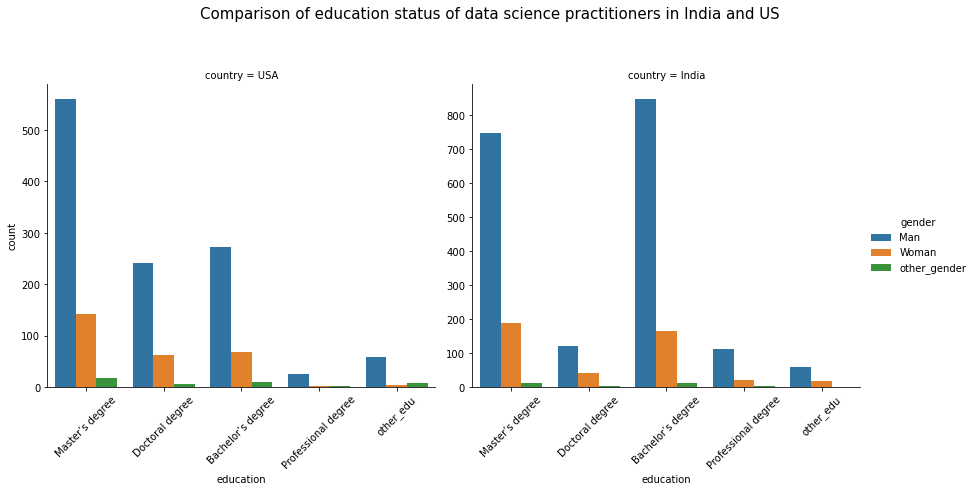

In [107]:
g = sns.catplot(x = 'education', hue = 'gender', col = 'country', kind = 'count', sharey = False, 
                height = 6, aspect = 1, data = df_final[(df_final.country == 'India') | (df_final.country == 'USA')])

g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top = 0.8)

# sns.plt.suptitle('YOUR TITLE HERE')
g.fig.suptitle('Comparison of education status of data science practitioners in India and US', fontsize = 15);

#### Insights from the above graph
1. In **India** majority of the data science practitioners are **Bachelors degree holder** while in the **USA** majority of them are **Master's degree holder**
2. **Doctoral degree holders** in **USA is more than India**

## Q2: Is there a difference in salary of data science practitioners in India and USA? Is there a correlation between education status and salary?

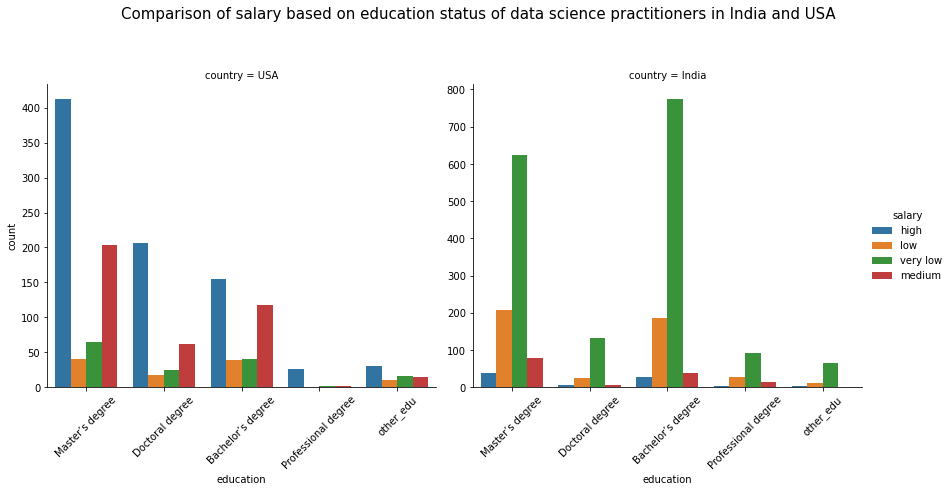

In [108]:
g = sns.catplot(x = 'education', hue = 'salary', col = 'country', kind = 'count', sharey = False, 
                height = 6, aspect = 1, data = df_final[(df_final.country == 'India') | (df_final.country == 'USA')])

g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top = 0.8)

# sns.plt.suptitle('YOUR TITLE HERE')
g.fig.suptitle('Comparison of salary based on education status of data science practitioners in India and USA', 
               fontsize = 15);

#### Insights from the above graph
1. The majority of **Bachelors & Masters degree holders in India** have **very low or low** salary while **in USA** their salary falls in **medium or high range**
2. Almost all data science practitioners in India have either **very low or low** salary. Only a small fraction has **medium or high** salary
3. **Masters and Doctoral degree holders** are paid higher than the **Bachelors degree holders**

## Q3: What is the distribution of age group of data science practitioners?

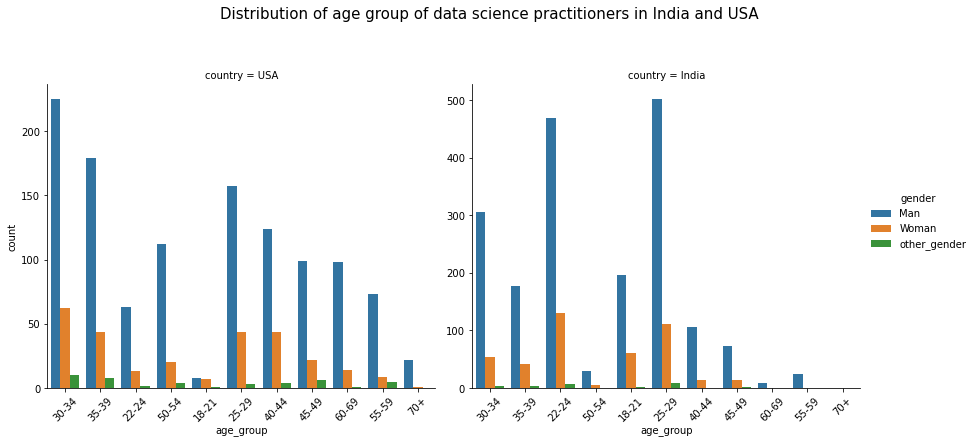

In [109]:
g = sns.catplot(x = 'age_group', hue = 'gender', col = 'country', kind = 'count', sharey = False, 
                height = 6, aspect = 1, data = df_final[(df_final.country == 'India') | (df_final.country == 'USA')])

g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top = 0.8)

# sns.plt.suptitle('YOUR TITLE HERE')
g.fig.suptitle('Distribution of age group of data science practitioners in India and USA', 
               fontsize = 15);

#### Insights from the above graph.
1. The majority of data science practitioners in the **USA belongs to [30-34] years age group**, while in **India majority belongs to [22-24] & [25-29] years age groups**
4. In **USA, a very small number of practitioners belongs to the [18-21] years age group**. In India, the number of practitioners in this age group is higher than USA

## Q4: Does job title depends on the education status of data science practitioners?

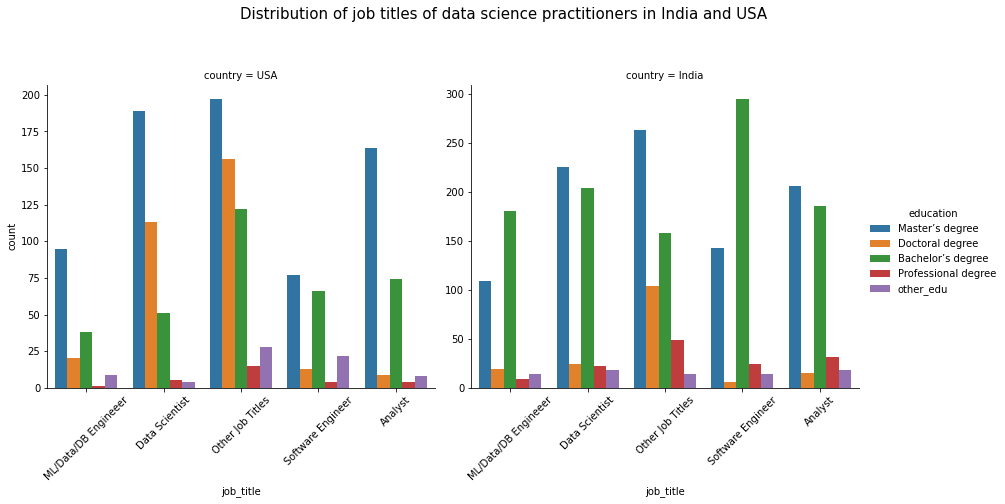

In [110]:
g = sns.catplot(x = 'job_title', hue = 'education', col = 'country', kind = 'count', sharey = False, 
                height = 6, aspect = 1, data = df_final[(df_final.country == 'India') | (df_final.country == 'USA')])

g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top = 0.8)

# sns.plt.suptitle('YOUR TITLE HERE')
g.fig.suptitle('Distribution of job titles of data science practitioners in India and USA', 
               fontsize = 15);

#### Insights from the above graph.
1. The majority of **Data Scientists in the USA have Masters/Doctoral degree** while in **India majority have Masters/Bachelors degree**

## Q5: What is the distribution of coding experience based on gender of data science practitioners?

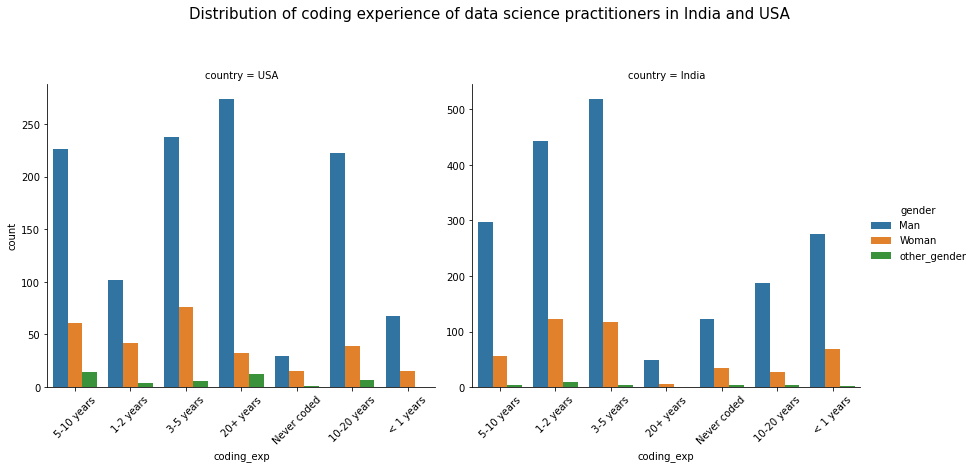

In [111]:
g = sns.catplot(x = 'coding_exp', hue = 'gender', col = 'country', kind = 'count', sharey = False, 
                height = 6, aspect = 1, data = df_final[(df_final.country == 'India') | (df_final.country == 'USA')])

g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top = 0.8)

# sns.plt.suptitle('YOUR TITLE HERE')
g.fig.suptitle('Distribution of coding experience of data science practitioners in India and USA', 
               fontsize = 15);

#### Insights from the above graph
1. In USA, the majority of practitioners have 20+ years of coding experience and most of them are males
2. In India, very few practitioners have 20+ years of coding experience
3. Male practitioners in USA and India are much higher in number than female practitioners
4. A small number of those exists in India and USA who have never coded

## Q6: What is the distribution of ML experience based on gender of data science practitioners??

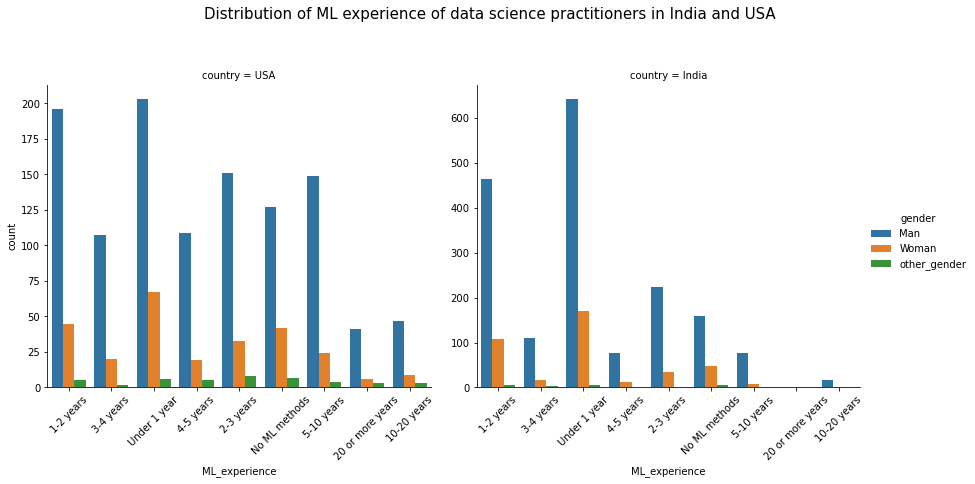

In [112]:
g = sns.catplot(x = 'ML_experience', hue = 'gender', col = 'country', kind = 'count', sharey = False, 
                height = 6, aspect = 1, data = df_final[(df_final.country == 'India') | (df_final.country == 'USA')])

g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top = 0.8)

# sns.plt.suptitle('YOUR TITLE HERE')
g.fig.suptitle('Distribution of ML experience of data science practitioners in India and USA', 
               fontsize = 15);

#### Insights from the above graph
1. Both India and USA have very large number of data science practitioners having less than 1 year of ML experience
2. There are very small number of practitioners in USA having 20+ years of ML experience while in India their count is very very small

In [113]:
# categorize coding experience, ML experience and age group column
df_final['coding_exp'] = df_final['coding_exp'].apply(group_coding_exp)
df_final['ML_experience'] = df_final['ML_experience'].apply(group_ML_exp)
df_final['age_group'] = df_final['age_group'].apply(group_age_column)

### Filling missing values
- Impute the missing values with the most frequent values as the data is categorical

In [114]:
df_final.fillna(df_final.mode().iloc[0], inplace = True)

# check null values
df_final.isnull().sum()

age_group        0
gender           0
country          0
education        0
job_title        0
coding_exp       0
ML_experience    0
company_size     0
team_size        0
is_ML_used       0
salary           0
dtype: int64

# 5. Modeling


In [116]:
# make input & label pairs for training the model

# target variable
Y = df_final['salary']

# input variable
X = df_final.drop('salary', axis = 1)

# Since all the columns have categorical data, we need one hot ecoding to convert the categories into numbers
# The categories are small in number in each column, hence one hot encoding won't increase the columns to a large number

# list of columns to do one hot encoding
cols = ['age_group', 'gender', 'education', 'job_title', 'coding_exp', 'ML_experience', 
        'company_size', 'team_size', 'is_ML_used']

X = pd.get_dummies(X, columns = cols)

# display the head of transformed data
X.head()

,country,age_group_25-40,age_group_40+,age_group_below_25,gender_Man,gender_Woman,gender_other_gender,education_Bachelor’s degree,education_Doctoral degree,education_Master’s degree,education_Professional degree,education_other_edu,job_title_Analyst,job_title_Data Scientist,job_title_ML/Data/DB Engineeer,job_title_Other Job Titles,job_title_Software Engineer,coding_exp_20+ years,coding_exp_5-20 years,coding_exp_Never coded,coding_exp_upto 5 years,ML_experience_20+ years exp,ML_experience_5-20 years exp,ML_experience_upto 5 years exp,company_size_large_comp,company_size_medium_comp,company_size_small_comp,team_size_large_team,team_size_medium_team,team_size_small_team,is_ML_used_No,is_ML_used_Yes,is_ML_used_unknown
2,USA,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3,Argentina,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0
4,USA,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
9,Germany,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
12,USA,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0


In [128]:
# split data into train and validation set
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 42)

print(f'Shape of x_train: {x_train.shape}\nShape of y_train: {y_train.shape}')
print(f'Shape of x_val: {x_val.shape}\nShape of y_val: {y_val.shape}')

Shape of x_train: (9656, 33)
Shape of y_train: (9656,)
Shape of x_val: (1073, 33)
Shape of y_val: (1073,)


In [129]:
# As the number of countries in the data set is large, we need label encoding to encode the country names
# One hot encoding will increase the number of columns in the data set

# instantiate LabelEncoder object 
label_encoder = LabelEncoder()

# fit and transform the training data
x_train['country'] = label_encoder.fit_transform(x_train['country'])

# transform the validation data
x_val['country'] = label_encoder.transform(x_val['country'])

In [133]:
# instantiate logistic regression model
lr_model = LogisticRegression()

# fit the model on training data
lr_model.fit(x_train, y_train)

# make predictions on validataion data
y_pred = lr_model.predict(x_val)

# calculate accuracry on validation data
print(f'Accuracy on validation data: {accuracy_score(y_val, y_pred)}')

Accuracy on validation data: 0.543336439888164


- Logistic regression model has given very low accuracy on prediction of salary of validation data. This means that the variables are not good at explaining the variablility in the Salary. Thus we need to find a better model.

# Conclusions
### Coding experience and age group 
1. The majority of data science practitioners have less than 30 years of age and most of them are male.
2. India has the highest number of data science practitioners according to the survey.
3. The majority of data science practitioners are students and most of them have coding experience of less than 1 year.

### Most regulary used/preferred tools and products/platforms
1. Python is the most preferred language
2. Matplotlib is the most preferred visualization library
3. Scikit learn is the most regularly used ML framework
4. Logistic/Linear regression is the most regularly used ML algorithm
5. Jupyter (lab, notebook) is the most preferred IDE
6. Colab notebooks are the most regularly used hosted notebook products
7. ImageNet architectures (such as ResNet, VGG, Inception, ect.) are the most regularly used computer vision methods
8. Word embeddings are the most frequently used Natural Language Processing methods
9. Amazon Web Servie (AWS) is the most regularly used cloug computing platform
10. Amazon EC2 is the most preferred cloud computing product
11. Google Cloud AI Platform/ML Engine is the most regularly used ML product
12. MySQL is the most regularly used big data product
13. GitHub is the most preferred choice for publicly sharing code
14. Coursera is the most preferred platform to gain data science skills.

### Comparison of data science practitioners in India and USA
#### The salary of data science practitioner in the USA is much hihger than the practitioners in India. The possible reasons for this large difference in the salary could be:

1. The majority of data science practitioners in India have Bachelor's degree while in the USA, tha majority of practitioners have Masters/Doctoral degree. Very small number of practitioners have Bachelors degree. 

2. In the USA, the majority of practitioners have rich coding experience (more than 5 years) while in India the majority of practitioners have less 5 years of coding experience.